In [1]:
from __future__ import division
from more_itertools import peekable
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scp
import pickle
import magenta
import os, time, re, json
%matplotlib inline
from IPython.core.display import display, HTML
### change width of notebook display
display(HTML("<style>.container { width:70% !important; }</style>"))

import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

# for exposing API
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from flask import Flask
from flask_restful import Resource, Api

JUPYTER_PICKLE_FILE = "config/shared_jupyter_data.pkl"
def write_shared_jupyter(key, value, path=JUPYTER_PICKLE_FILE, overwrite=False):
    if (os.path.exists(path)):
        with open(path, "rb") as fp:
            shared_jupyter_data = pickle.load(fp)
        if overwrite:
            shared_jupyter_data = {key: value}
        else:
            shared_jupyter_data[key] = value
    else:
        shared_jupyter_data = {key: value}
    with open(path, 'wb') as fp: 
        pickle.dump(shared_jupyter_data, fp)

def read_shared_jupyter(key=None, path=JUPYTER_PICKLE_FILE):
    if (os.path.exists(path)):
        with open(path, "rb") as fp:
            shared_jupyter_data = pickle.load(fp)
            if key is not None:
                if key in shared_jupyter_data:
                    return(shared_jupyter_data[key])
                else:
                    print("Not found!")
                    return(None)
            else:
                return(shared_jupyter_data)
    else:
        print("No data")

def pandasToJson(df):
    return(df.to_json(orient="split"))
def jsonToPandas(json):
    return(pd.read_json(json, orient="split"))

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

FIG_WIDTH = 1200
FIG_HEIGHT = 800

PITCH_MIN = 20
PITCH_MAX = 120
VELOCITY_MIN = 0
VELOCITY_MAX = 120

def hheader(x):
    print("#########################################")
    print("### {}".format(x))
    print("#########################################")

# Magenta dependencies:
# https://github.com/magenta/magenta

# Magenta uses pretty_midi to deal with midi files
import pretty_midi

C:\Users\echow\Miniconda3\envs\tensorflow\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
C:\Users\echow\Miniconda3\envs\tensorflow\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
C:\Users\echow\Miniconda3\envs\tensorflow\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Could

# Read in music stream and make decisions

Each agent:
- Read in music stream
- Update predictive model
- Probabilistic decision rule: create order and submit

In [2]:
""" Each agent reads in music stream and responds
    (start with a single agent)
"""

import requests
from collections import OrderedDict

### Iteration parameters
STREAM_SLEEP_SEC = 1

### Agent parameters
WEALTH = 10000

iterations = 1
assetDataSoFar = OrderedDict()
initialModelTrained = False
while True:
    if (iterations % 1000 == 0):
        print("Iterations {} ...".format(iterations+1))
    
    ### Read in music stream (assume perpetual)
    currAssetData = requests.get("http://localhost:8100/read")
    if (currAssetData.status_code != 200):
        raise Exception("GET request failed.")
    currAsset = currAssetData.json()
    currAssetTime = currAsset['currTime']
    currAssetBar = jsonToPandas(currAsset['lastBar'])
    
    ### add to historical data if hasn't been seen yet
    for sx in range(currAssetBar.shape[0]):
        currAssetObs = currAssetBar.iloc[[sx]]
        currStreamingIx = currAssetObs.streaming_start_sec.values[0]
        if (currStreamingIx not in assetDataSoFar):
            assetDataSoFar[currStreamingIx] = currAssetObs
        else:
            print("Already stored")
        
    print("--------------------------------------------")
    print(currAssetTime)
    display(currAssetBar)
    
    ### Wait until have plenty of data so far (to start training a baseline model)
    ### need <<< refresh rate of streaming market infrastructure
    if (iterations < 50):
        time.sleep(STREAM_SLEEP_SEC)
        iterations += 1
        continue
        
    raise Exception()

    """ Analysis with current order here """
    
    ### get historical data so far
    ### the current bar (currAssetBar) will be the last rows of this dataframe
    assetDataSoFar_df = pd.concat(assetDataSoFar.values())
    
    ### if model is not train, train model
    if not initialModelTrained:
        
        ### Train predictive model 
        
        initialModelTrained = True
    
    
    

    ### Take a short break between analyses (so plotly can catch up)
    ### should be >> plot auto-update interval so that all plots
    ### update basically at the same time. 
    time.sleep(STREAM_SLEEP_SEC) # 1 second is comfortable for nice UI
    iterations += 1

--------------------------------------------
1618924016.35793


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
830,830,0,830,830.00833,830.489211,830.461455,830.95833,"830.00833,830.12917,830.14167,830.25208,830.25...",830.06875,830.613988,830.551560,831.46042,"830.06875,830.24688,830.20938,830.3375,830.312...",55,65.857143,67,74,"67,62,67,59,71,55,74,67,74,71,59,67,60,69",66,77.428571,80.0,84,"84,73,80,72,82,77,82,77,80,80,71,80,66,80",0.05625,0.124778,0.106775,0.50208,"0.06042,0.11771,0.06771,0.08542,0.05625,0.1218...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
831,831,0,831,831.08854,831.548645,831.557810,831.92500,"831.08854,831.23125,831.35417,831.36458,831.49...",831.19583,831.799061,831.814580,832.46458,"831.19583,831.325,831.43333,831.85208,831.6031...",59,65.700000,63,79,"62,64,62,78,64,60,59,79,67,62",55,65.900000,67.5,70,"69,64,67,70,55,62,68,70,69,65",0.07604,0.250416,0.127085,0.65312,"0.10729,0.09375,0.07917,0.4875,0.10729,0.15729...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
832,832,0,832,832.06667,832.537188,832.553645,832.90000,"832.06667,832.19479,832.33646,832.48229,832.48...",832.19271,832.657604,832.654685,833.06146,"832.19271,832.28958,832.41146,832.63229,832.64...",55,65.500000,61,79,"57,59,62,55,74,76,60,79,59,74",59,66.300000,66.0,73,"65,64,60,59,66,71,66,68,71,73",0.03854,0.120416,0.129165,0.16146,"0.12604,0.09479,0.075,0.15,0.16146,0.11875,0.0...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
833,833,0,833,833.04271,833.406144,833.394270,833.89062,"833.04271,833.04583,833.17083,833.31562,833.31...",833.07812,833.564271,833.506775,833.98229,"833.17188,833.07812,833.34479,833.43333,833.46...",55,64.200000,60,79,"76,60,79,71,55,57,72,60,55,57",64,69.600000,70.0,77,"77,72,72,70,67,66,72,64,66,70",0.03229,0.158126,0.133335,0.51146,"0.12917,0.03229,0.17396,0.11771,0.14792,0.0770...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
834,834,0,834,834.01667,834.432480,834.430210,834.85833,"834.01667,834.16042,834.1625,834.29479,834.301...",834.18646,834.553409,834.550000,834.99479,"834.18646,834.29896,834.30833,834.42188,834.33...",52,69.090909,79,84,"60,52,79,81,54,84,52,79,81,54,84",68,72.909091,72.0,80,"69,72,69,75,77,68,78,70,73,80,71",0.03125,0.120926,0.136460,0.16979,"0.16979,0.13854,0.14583,0.12708,0.03125,0.1197...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618924018.9661257


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
835,835,0,835,835.01250,835.455024,835.41458,835.96771,"835.0125,835.01667,835.03125,835.1375,835.1593...",835.07083,835.567954,835.580210,836.06458,"835.11771,835.13542,835.07083,835.24271,835.28...",55,68.352941,66.0,81,"76,57,55,62,78,66,81,61,76,62,78,66,81,73,57,7...",61,71.058824,70.0,79,"71,61,67,65,70,64,69,72,76,69,77,69,78,79,72,7...",0.03958,0.112928,0.118750,0.16562,"0.10521,0.11875,0.03958,0.10521,0.12604,0.1218...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
836,836,0,836,836.09688,836.480689,836.50104,836.94062,"836.09688,836.10729,836.23646,836.24167,836.36...",836.17396,836.585256,836.611460,837.07812,"836.20833,836.17396,836.32917,836.39062,836.47...",54,66.615385,69.0,78,"78,62,73,57,74,59,62,78,69,54,55,71,74",63,72.076923,74.0,80,"72,63,76,67,75,67,64,77,80,67,77,78,74",0.04896,0.104567,0.107290,0.15625,"0.11146,0.06667,0.09271,0.14896,0.11042,0.0718...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
837,837,0,837,837.07500,837.478384,837.48177,837.92396,"837.075,837.08021,837.21458,837.22188,837.3395...",837.17396,837.587239,837.603645,838.08021,"837.17396,837.23646,837.37396,837.25833,837.43...",52,65.750000,72.0,76,"73,52,74,54,76,71,55,57,73,76,74,54",72,78.000000,78.5,83,"77,72,79,79,77,75,83,81,78,80,79,76",0.03646,0.108855,0.112500,0.15938,"0.09896,0.15625,0.15938,0.03646,0.09167,0.1166...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
838,838,0,838,838.05104,838.480641,838.46667,838.89583,"838.05104,838.05729,838.18021,838.32708,838.33...",838.11146,838.599740,838.545830,839.01875,"838.11146,838.19688,838.38542,838.49688,838.44...",55,68.916667,73.5,78,"55,76,78,57,73,74,59,78,76,61,78,62",74,81.916667,82.0,88,"82,77,77,86,74,80,88,79,82,84,87,87",0.02500,0.119097,0.127085,0.20521,"0.06042,0.13958,0.20521,0.16979,0.11042,0.1145...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
839,839,0,839,839.02292,839.401620,839.30833,839.86354,"839.02292,839.16354,839.18542,839.30417,839.30...",839.12188,839.541899,839.560420,839.93542,"839.12188,839.25521,839.32812,839.7625,839.466...",57,71.222222,73.0,81,"81,79,57,81,61,64,69,73,76",74,84.777778,86.0,90,"85,87,82,87,82,74,86,90,90",0.03125,0.140278,0.100000,0.45833,"0.09896,0.09167,0.14271,0.45833,0.15833,0.1093...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618924024.2971957


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
845,845,0,845,845.06979,845.486779,845.476040,845.93646,"845.06979,845.09479,845.20417,845.20729,845.34...",845.20417,845.659053,845.71979,846.18333,"845.21042,845.20417,845.51771,845.28021,845.82...",38,52.692308,43.0,69,"40,67,67,42,61,43,42,69,43,67,40,66,38",42,61.307692,63,72,"67,69,42,63,72,62,60,61,56,67,49,65,64",0.05208,0.172275,0.109380,0.47396,"0.14062,0.10938,0.31354,0.07292,0.47396,0.1041...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
846,846,0,846,846.04792,846.475095,846.468750,846.89792,"846.04792,846.19479,846.19583,846.32917,846.34...",846.13958,846.616668,846.63333,847.04896,"846.13958,846.33438,846.34688,846.43854,846.63...",40,56.272727,61.0,71,"62,67,40,69,42,62,71,43,45,61,57",59,66.545455,65,76,"65,60,63,67,64,59,75,66,72,76,65",0.07396,0.141572,0.110420,0.30417,"0.09167,0.13958,0.15104,0.10938,0.29062,0.0781...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
847,847,0,847,847.03438,847.436112,847.436455,847.88542,"847.03438,847.04167,847.16979,847.18333,847.30...",847.16667,847.573004,847.50781,848.03229,"847.16667,847.18542,847.25208,847.44375,847.35...",40,56.416667,59.5,69,"62,47,64,49,57,66,50,40,67,64,69,42",55,71.416667,72,84,"68,63,64,67,55,76,78,84,80,67,78,77",0.04896,0.136893,0.128645,0.32604,"0.13229,0.14375,0.08229,0.26042,0.04896,0.0562...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
848,848,0,848,848.00938,848.477485,848.423960,848.97292,"848.00938,848.025,848.14375,848.28854,848.2895...",848.09167,848.636138,848.64896,849.12708,"848.09167,848.32396,848.23854,848.41875,848.39...",43,57.846154,59.0,73,"71,43,64,45,73,62,47,59,64,49,66,50,59",70,77.923077,80,83,"79,80,70,80,80,80,80,74,76,74,82,83,75",0.08229,0.158653,0.125000,0.29896,"0.08229,0.29896,0.09479,0.13021,0.10312,0.125,...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
849,849,0,849,849.11354,849.525434,849.535420,849.96354,"849.11354,849.11771,849.25208,849.27292,849.40...",849.23750,849.783507,849.68646,851.02292,"849.2375,849.28333,851.02292,849.30521,849.611...",52,59.583333,59.0,69,"67,52,69,54,66,55,61,54,62,66,57,52",67,77.250000,78,86,"82,78,78,84,69,86,67,84,74,68,75,82",0.03021,0.258073,0.130210,1.77083,"0.12396,0.16562,1.77083,0.03229,0.20938,0.1364...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618924026.8993075


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
850,850,0,850,850.10208,850.567628,850.517710,850.95000,"850.10208,850.10625,850.25208,850.39271,850.39...",850.14375,850.671715,850.59479,851.10000,"850.14375,850.19062,850.48438,850.50417,850.52...",50,57.692308,57,66,"54,62,66,61,55,54,62,66,57,52,50,52,59",23,75.615385,81,88,"88,74,70,70,84,86,78,75,84,81,83,23,87",0.03125,0.104087,0.095830,0.23229,"0.04167,0.08438,0.23229,0.11146,0.13229,0.0468...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
851,851,0,851,851.07396,851.485257,851.481250,851.91146,"851.07396,851.08125,851.2,851.20729,851.34271,...",851.14688,851.599198,851.65104,851.99271,"851.14688,851.19062,851.24896,851.26354,851.50...",50,60.538462,59,74,"55,67,59,62,59,74,55,50,67,50,69,54,66",70,82.230769,82,88,"79,81,78,88,85,86,70,82,82,88,82,82,86",0.03958,0.113943,0.081250,0.44375,"0.07292,0.10938,0.04896,0.05625,0.16562,0.4437...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
852,852,0,852,852.03229,852.449553,852.439580,852.99896,"852.03229,852.04479,852.18125,852.18333,852.29...",852.08958,852.645610,852.55469,853.41250,"852.08958,852.11042,852.59167,852.26146,852.35...",49,59.642857,57,74,"57,62,74,57,57,54,50,66,50,52,67,69,71,49",65,82.714286,86,88,"82,86,86,86,65,79,88,87,86,87,87,80,78,81",0.04271,0.196056,0.090100,0.82708,"0.05729,0.06563,0.41042,0.07812,0.05729,0.0468...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
853,853,0,853,853.01250,853.525095,853.534380,853.96875,"853.0125,853.13021,853.27083,853.40625,853.414...",853.11146,853.680399,853.69271,854.14167,"853.11146,853.33125,853.37188,853.69271,853.51...",50,64.272727,67,73,"69,71,67,50,66,69,52,67,54,69,73",77,82.636364,82,88,"82,78,77,88,84,80,85,82,87,86,80",0.09062,0.155304,0.107290,0.30938,"0.09896,0.20104,0.10104,0.28646,0.09583,0.1041...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
854,854,0,854,854.10000,854.519345,854.509895,854.93750,"854.1,854.11979,854.25104,854.25104,854.37188,...",854.20208,854.630059,854.61823,855.09688,"854.21354,854.20208,854.33333,854.37812,854.44...",52,65.571429,66,79,"71,55,73,57,61,76,57,79,52,79,57,76,52,73",76,83.857143,85,92,"80,85,85,84,85,85,85,86,81,92,76,82,81,87",0.05104,0.110713,0.109895,0.16875,"0.11354,0.08229,0.08229,0.12708,0.07292,0.0572...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618924029.5111237


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
855,855,0,855,855.07604,855.445404,855.418750,855.89479,"855.07604,855.08438,855.1375,855.19167,855.208...",855.13542,855.523592,855.51146,856.03333,"855.21146,855.13542,855.21562,855.35625,855.26...",45,64.294118,71.0,79,"49,69,71,52,73,74,49,76,78,45,79,47,78,49,76,7...",64,82.058824,83.0,90,"80,83,70,64,85,83,80,81,81,84,90,81,86,83,87,8...",0.02813,0.078188,0.070830,0.16458,"0.13542,0.05104,0.07812,0.16458,0.05938,0.0739...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
856,856,0,856,856.02812,856.434924,856.441670,856.87292,"856.02812,856.03333,856.16458,856.17083,856.19...",856.05417,856.528618,856.48438,857.19271,"856.0875,856.05417,856.20312,856.21979,856.227...",38,66.315789,71.0,78,"76,78,55,74,71,69,57,74,69,76,77,67,45,73,38,7...",35,74.842105,82.0,89,"83,35,89,87,68,51,87,70,86,70,65,87,85,84,82,8...",0.02083,0.093696,0.051040,0.47500,"0.05938,0.02083,0.03854,0.04896,0.03438,0.0322...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
857,857,0,857,857.00312,857.418359,857.352605,857.96771,"857.00312,857.00521,857.16458,857.16875,857.53...",857.04062,857.511067,857.44323,858.11458,"857.08438,857.04062,857.19479,857.20104,857.68...",45,54.875000,54.5,66,"45,66,50,62,57,54,50,55",59,72.375000,72.0,87,"82,81,84,87,62,63,59,61",0.03021,0.092709,0.106770,0.14896,"0.08125,0.03542,0.03021,0.03229,0.14896,0.1343...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
858,858,0,858,858.10625,858.509524,858.512500,858.93333,"858.10625,858.23438,858.36771,858.5125,858.628...",858.23229,858.635119,858.59688,859.01771,"858.23229,858.35208,858.52812,858.59688,858.77...",50,53.428571,54.0,57,"54,50,57,54,50,55,54",67,70.428571,68.0,77,"67,67,68,68,71,75,77",0.08438,0.125597,0.126040,0.16354,"0.12604,0.11771,0.16042,0.08438,0.14271,0.1635...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
859,859,0,859,859.05729,859.402083,859.400000,859.76250,"859.05729,859.19896,859.33958,859.46042,859.59...",859.13750,859.483335,859.50469,859.79792,"859.1375,859.2875,859.47396,859.53542,859.6677...",50,54.666667,55.5,60,"50,57,54,57,60,50",79,81.666667,81.5,85,"81,85,82,83,80,79",0.03542,0.081250,0.077605,0.13437,"0.08021,0.08854,0.13437,0.075,0.07396,0.03542",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618924032.1173325


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
860,860,0,860,860.06875,860.434025,860.398955,860.91458,"860.06875,860.21458,860.33333,860.46458,860.60...",860.16562,860.510068,860.456770,860.98333,"860.16562,860.34896,860.39062,860.52292,860.64...",52,57.833333,59.0,62,"59,55,59,62,52,60",77,80.500000,80.5,84,"80,77,77,81,84,84",0.04062,0.076038,0.063540,0.13437,"0.09687,0.13437,0.05729,0.05833,0.04062,0.06875",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
861,861,0,861,861.05938,861.454614,861.456250,861.86875,"861.05938,861.18333,861.31771,861.45625,861.58...",861.18229,861.537649,861.558330,861.96667,"861.18229,861.24271,861.36667,861.55833,861.68...",54,59.428571,60.0,64,"57,60,64,54,62,60,59",73,77.142857,76.0,81,"76,76,76,79,73,81,79",0.04896,0.083037,0.096870,0.12292,"0.12292,0.05938,0.04896,0.10208,0.09687,0.0531...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
862,862,0,862,862.00312,862.547307,862.557810,862.97396,"862.00312,862.13021,862.26562,862.39375,862.53...",862.04792,862.690539,862.650000,863.38750,"862.04792,862.19479,862.35417,862.44896,862.68...",43,52.750000,53.5,62,"55,50,55,50,62,45,47,43,59,55,60,52",50,64.166667,66.0,76,"64,72,76,68,69,51,50,70,70,61,63,56",0.03854,0.143228,0.082810,0.71354,"0.04479,0.06458,0.08854,0.05521,0.15208,0.0666...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
863,863,0,863,863.11354,863.557378,863.543750,863.97708,"863.11354,863.12917,863.23958,863.39375,863.40...",863.19479,863.783333,863.808335,864.44167,"863.19479,863.81771,863.30417,863.46979,863.49...",42,53.833333,55.0,62,"59,50,55,62,42,59,43,55,60,52,59,50",43,55.666667,55.0,64,"63,52,53,58,64,55,61,43,55,55,57,52",0.06458,0.225953,0.102080,0.70521,"0.08125,0.68854,0.06458,0.07604,0.09583,0.0906...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
864,864,0,864,864.11771,864.543056,864.547920,864.95833,"864.11771,864.25729,864.26354,864.39271,864.40...",864.28229,864.685677,864.660940,865.16667,"864.28229,864.32812,864.40104,864.53438,864.54...",42,52.500000,52.5,65,"55,42,62,43,59,47,62,65,50,47,55,43",55,64.083333,63.0,73,"55,60,67,64,69,61,68,68,60,62,73,62",0.07083,0.142622,0.133335,0.33646,"0.16458,0.07083,0.1375,0.14167,0.13958,0.11354...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618924034.7190409


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
865,865,0,865,865.10417,865.513943,865.530210,865.96979,"865.10417,865.13021,865.25521,865.26771,865.38...",865.23958,865.651522,865.633330,866.11667,"865.23958,865.28021,865.39062,865.40521,865.50...",45,54.846154,52.0,67,"48,64,45,60,48,64,67,52,48,57,45,50,65",62,69.923077,69.0,78,"65,69,69,73,69,74,77,62,65,78,65,66,77",0.07292,0.137581,0.123960,0.34375,"0.13542,0.15,0.13542,0.1375,0.11458,0.11458,0....",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
866,866,0,866,866.09792,866.516668,866.514065,866.94688,"866.09792,866.10625,866.23438,866.24062,866.37...",866.24479,866.652454,866.647915,867.09479,"866.25417,866.24479,866.35208,866.37396,866.51...",47,56.857143,56.0,69,"47,62,50,65,53,69,50,59,47,67,65,50,64,48",65,72.000000,70.5,82,"65,82,68,80,65,80,65,73,66,77,76,71,70,70",0.09896,0.135789,0.136980,0.16146,"0.15625,0.13854,0.11771,0.13333,0.13542,0.0989...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
867,867,0,867,867.08646,867.524420,867.598960,867.89062,"867.08646,867.20521,867.33333,867.46354,867.59...",867.16458,867.660764,867.666670,868.11562,"867.16458,867.30625,867.44792,867.57917,867.77...",42,53.111111,52.0,60,"52,55,52,48,60,52,57,42,60",58,67.000000,66.0,76,"60,66,64,58,68,66,73,72,76",0.06562,0.136341,0.114580,0.34063,"0.07812,0.10104,0.11458,0.11563,0.17708,0.0656...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
868,868,0,868,868.03125,868.566579,868.556250,868.98958,"868.03125,868.16771,868.28646,868.41667,868.41...",868.16667,868.659808,868.643750,869.12083,"868.16667,868.29583,868.36562,868.50833,868.54...",45,55.250000,55.5,64,"64,60,57,60,45,47,54,50,62,54,50,60",66,75.416667,75.0,83,"76,78,81,83,73,71,74,66,83,68,72,80",0.02917,0.093232,0.107295,0.14271,"0.13542,0.12813,0.07917,0.09167,0.12292,0.1427...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
869,869,0,869,869.01667,869.390017,869.321875,869.94479,"869.01667,869.0875,869.09792,869.16771,869.262...",869.10729,869.511111,869.459895,869.99896,"869.10729,869.18125,869.23854,869.25938,869.31...",40,55.166667,58.0,62,"59,60,47,59,50,57,40,55,59,62,59,55",58,72.583333,75.5,80,"68,61,73,58,63,80,76,75,80,78,79,80",0.05417,0.121093,0.091670,0.39375,"0.09062,0.09375,0.14062,0.09167,0.05625,0.1447...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618924037.3309765


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
870,870,0,870,870.07292,870.494793,870.49844,870.95625,"870.07292,870.08438,870.20625,870.21979,870.35...",870.15104,870.628906,870.629685,871.07083,"870.20208,870.15104,870.34479,870.25938,870.46...",43,52.000000,50.0,67,"43,59,45,52,48,60,52,48,57,45,67,48",49,65.750000,68.5,75,"69,74,68,71,61,74,56,55,72,49,75,65",0.03958,0.134114,0.12917,0.29583,"0.12917,0.06667,0.13854,0.03958,0.11146,0.1291...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
871,871,0,871,871.07708,871.486618,871.49479,871.93542,"871.07708,871.09375,871.18229,871.22188,871.35...",871.18229,871.711459,871.696880,872.62917,"871.20729,871.18229,871.77396,871.2875,871.479...",49,59.461538,62.0,69,"66,50,50,62,59,67,66,57,62,49,69,66,50",52,64.384615,64.0,74,"66,70,52,63,74,66,64,62,56,73,68,63,60",0.06250,0.224839,0.10521,0.69375,"0.13021,0.08854,0.59167,0.06563,0.12708,0.0625...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
872,872,0,872,872.06146,872.525347,872.54948,872.92396,"872.06146,872.19896,872.20417,872.33958,872.34...",872.11979,872.676736,872.742705,873.04583,"872.11979,872.33021,872.3375,872.43438,872.898...",49,60.833333,62.0,69,"62,59,67,66,57,62,49,69,50,66,54,69",60,67.916667,67.5,80,"60,63,66,66,67,62,68,71,71,73,68,80",0.05833,0.151387,0.13021,0.55000,"0.05833,0.13125,0.13333,0.09479,0.55,0.12708,0...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
873,873,0,873,873.05521,873.488142,873.48125,873.91042,"873.05521,873.05729,873.18542,873.19896,873.32...",873.15625,873.612981,873.613540,874.01979,"873.18646,873.15625,873.25417,873.53021,873.4,...",50,61.461538,59.0,74,"57,72,54,62,50,55,71,52,67,55,71,74,59",64,73.615385,71.0,84,"65,77,67,79,70,64,79,70,83,71,84,81,67",0.06875,0.124840,0.10938,0.33125,"0.13125,0.09896,0.06875,0.33125,0.07812,0.1302...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
874,874,0,874,874.02604,874.502753,874.51094,874.99167,"874.02604,874.04062,874.16042,874.30417,874.31...",874.13229,874.640326,874.640625,875.12812,"874.13229,874.33333,874.29896,874.42396,874.45...",52,61.785714,58.5,76,"55,64,52,57,72,54,69,57,72,76,60,57,66,54",68,75.071429,72.5,84,"69,77,71,70,81,72,84,68,84,82,69,73,82,69",0.07812,0.137575,0.13594,0.29271,"0.10625,0.29271,0.13854,0.11979,0.13958,0.1604...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618924042.5523722


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
880,880,0,880,880.12604,880.565018,880.609895,880.98438,"880.12604,880.13021,880.16562,880.26979,880.40...",880.21250,880.737413,880.71406,881.69792,"880.45,880.23438,880.2125,880.39896,880.51771,...",51,67.333333,69,81,"81,64,77,69,72,69,66,52,69,67,51,71",32,76.083333,78.0,90,"89,74,32,73,76,84,84,90,80,70,76,85",0.02812,0.172396,0.116145,0.71354,"0.32396,0.10417,0.04688,0.12917,0.10833,0.1010...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
881,881,0,881,881.09375,881.529830,881.516670,881.94896,"881.09375,881.23333,881.27292,881.38438,881.40...",881.17917,881.688354,881.72292,882.17396,"881.17917,881.39167,881.41458,881.50729,881.72...",47,58.727273,52,79,"47,52,79,51,78,47,54,69,51,71,47",71,78.818182,78.0,88,"72,78,82,74,87,71,80,84,76,88,75",0.08021,0.158524,0.130210,0.33854,"0.08542,0.15833,0.14167,0.12292,0.31458,0.1302...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
882,882,0,882,882.10312,882.492868,882.515620,882.91771,"882.10312,882.10625,882.23125,882.24167,882.24...",882.18542,882.622036,882.59792,882.99271,"882.18542,882.25938,882.55312,882.32396,882.56...",47,62.769231,57,79,"52,79,71,51,78,47,69,54,51,54,75,57,78",61,76.000000,75.0,88,"72,80,61,76,81,73,80,74,68,75,85,75,88",0.06458,0.129166,0.082290,0.32188,"0.08229,0.15313,0.32188,0.08229,0.32188,0.1156...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
883,883,0,883,883.05208,883.500650,883.540625,883.89583,"883.05208,883.05312,883.08854,883.21042,883.34...",883.09688,883.635482,883.62396,884.35938,"883.45208,883.09688,883.22604,883.27708,883.46...",47,67.375000,74,81,"79,47,75,71,76,55,52,73,55,76,75,59,79,49,81,76",45,79.062500,80.5,90,"86,86,74,75,80,76,72,81,76,81,45,78,87,90,90,88",0.03542,0.134831,0.100000,0.47604,"0.4,0.04375,0.1375,0.06667,0.11771,0.08958,0.1...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
884,884,0,884,884.03229,884.541536,884.558330,884.98021,"884.03229,884.16771,884.16979,884.29375,884.30...",884.09583,884.700911,884.66406,885.97500,"884.09583,884.22604,884.26562,884.41667,884.38...",51,68.375000,74,83,"73,57,78,54,75,57,78,60,81,51,83,78,59,75,57,78",73,80.750000,81.5,86,"80,80,77,74,85,73,84,76,83,86,86,85,77,83,86,77",0.03437,0.159374,0.081250,1.27292,"0.06354,0.05833,0.09583,0.12292,0.08021,0.0770...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618924045.1647587


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
885,885,0,885,885.10625,885.527708,885.51354,885.94583,"885.10625,885.12396,885.23646,885.25312,885.36...",885.20729,885.639305,885.616670,886.48750,"885.20729,885.2125,885.29062,885.37292,885.412...",43,61.666667,55,79,"55,76,52,79,47,75,52,76,79,47,45,43,75,48,76",63,81.333333,83.0,94,"88,82,81,76,83,85,85,85,79,65,63,89,83,94,82",0.03750,0.111597,0.08333,0.54896,"0.10104,0.08854,0.05417,0.11979,0.04583,0.075,...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
886,886,0,886,886.08229,886.556534,886.60104,886.90104,"886.08229,886.21875,886.34271,886.48125,886.48...",886.16771,886.678409,886.694790,887.01146,"886.16771,886.36562,886.49479,886.55417,886.62...",45,65.090909,72,81,"80,81,77,75,47,76,48,45,72,47,68",71,76.909091,78.0,82,"74,80,78,78,71,74,79,81,77,82,72",0.07292,0.121876,0.12500,0.16771,"0.08542,0.14688,0.15208,0.07292,0.13854,0.0937...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
887,887,0,887,887.01562,887.476107,887.47396,887.95521,"887.01562,887.01562,887.14479,887.16354,887.26...",887.07812,887.585546,887.563020,888.07708,"887.07812,887.12292,887.35312,887.25625,887.34...",42,56.562500,57,72,"48,69,45,65,47,63,48,64,42,63,45,66,48,69,72,51",72,80.687500,81.5,88,"85,75,86,83,84,82,81,79,79,88,75,83,72,86,80,73",0.06250,0.109440,0.10677,0.20833,"0.0625,0.10729,0.20833,0.09271,0.08333,0.125,0...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
888,888,0,888,888.05521,888.474034,888.46563,888.99479,"888.05521,888.06771,888.19479,888.20833,888.31...",888.10417,888.601933,888.616145,889.14062,"888.22396,888.10417,888.29583,888.36458,888.45...",47,64.571429,65,79,"54,71,57,75,55,76,54,78,52,79,59,71,76,47",69,77.928571,78.0,88,"74,72,69,87,71,82,74,82,76,80,82,88,82,72",0.03646,0.127901,0.13906,0.28542,"0.16875,0.03646,0.10104,0.15625,0.14375,0.1479...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
889,889,0,889,889.00208,889.364522,889.29688,889.88229,"889.00208,889.01667,889.13854,889.14583,889.16...",889.05625,889.609925,889.543750,890.92708,"889.13854,889.05625,889.86979,889.28854,889.2,...",51,67.235294,69,77,"75,69,52,77,76,67,69,77,76,64,69,60,67,59,64,5...",21,58.823529,64.0,84,"84,75,76,62,68,60,67,30,26,21,62,67,64,64,48,6...",0.03438,0.245405,0.09479,1.63021,"0.13646,0.03958,0.73125,0.14271,0.03646,0.0427...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618924047.771649


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
890,890,0,890,890.01979,890.464670,890.450000,890.90521,"890.01979,890.02292,890.16354,890.29583,890.30...",890.07812,890.648264,890.682815,891.03854,"890.71875,890.07812,890.22188,890.38021,890.45...",51,62.000000,64,71,"52,67,64,69,60,67,59,64,51,71,52,68",49,58.500000,58.0,66,"65,60,49,58,57,58,56,51,62,56,64,66",0.05521,0.183592,0.104685,0.69896,"0.69896,0.05521,0.05833,0.08437,0.15625,0.0656...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
891,891,0,891,891.01354,891.510277,891.573960,891.99062,"891.01354,891.04271,891.15521,891.17083,891.29...",891.13646,891.651181,891.690620,892.12188,"891.14062,891.13646,891.29271,891.26875,891.42...",52,63.266667,60,76,"56,71,59,74,56,64,52,72,57,54,69,72,57,76,60",63,72.066667,69.0,84,"66,69,65,76,65,78,63,81,63,68,84,80,72,84,67",0.09375,0.140904,0.130210,0.31354,"0.12708,0.09375,0.1375,0.09792,0.13021,0.31354...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
892,892,0,892,892.11771,892.543591,892.521880,892.94792,"892.11771,892.12083,892.25,892.38229,892.38958...",892.24479,892.683895,892.657290,893.08229,"892.24479,892.35625,892.375,892.51771,892.5291...",54,64.307692,62,77,"57,66,54,59,74,56,71,59,74,62,77,59,68",68,78.307692,79.0,88,"70,84,69,68,83,71,86,74,86,75,85,79,88",0.09583,0.140305,0.135420,0.23542,"0.12708,0.23542,0.125,0.13542,0.13958,0.14375,...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
893,893,0,893,893.06667,893.451998,893.410415,893.91979,"893.06667,893.075,893.19688,893.19792,893.3291...",893.21042,893.690626,893.702605,894.48125,"893.21146,893.21042,893.36667,893.30312,894.04...",56,67.250000,69,76,"56,76,74,59,57,72,69,65,74,64,72,69",65,76.083333,77.5,87,"80,81,81,82,87,79,69,65,76,71,76,66",0.10521,0.238627,0.153125,0.72187,"0.14479,0.13542,0.16979,0.10521,0.71979,0.1385...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
894,894,0,894,894.04688,894.467276,894.476045,894.90938,"894.04688,894.06354,894.2,894.20625,894.3375,8...",894.13021,894.665017,894.663020,895.09583,"894.13021,894.20521,894.90312,894.32396,894.43...",56,67.166667,69,76,"56,76,57,72,69,74,65,72,64,69,56,76",67,72.833333,73.0,81,"74,80,70,74,67,74,68,73,73,72,68,81",0.07917,0.197743,0.133335,0.70312,"0.08333,0.14167,0.70312,0.11771,0.09271,0.1489...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618924050.3807235


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
895,895,0,895,895.04792,895.443030,895.43854,895.88542,"895.04792,895.05312,895.17083,895.18021,895.29...",895.18542,895.595032,895.57708,896.03438,"895.18542,895.19479,895.29896,895.28646,895.45...",57,66.923077,64,79,"57,73,61,76,64,79,61,69,57,62,78,59,74",71,78.769231,76,87,"76,82,76,87,71,84,76,83,73,72,82,75,87",0.10104,0.152003,0.13854,0.34687,"0.1375,0.14167,0.12812,0.10625,0.16042,0.10104...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
896,896,0,896,896.00417,896.503473,896.56458,896.98854,"896.00417,896.01667,896.15208,896.15938,896.28...",896.16354,896.649721,896.69896,897.11354,"896.16354,896.16458,896.26458,896.28646,896.42...",59,70.133333,67,83,"62,78,81,66,62,71,59,64,79,61,76,64,79,67,83",66,77.866667,75,89,"75,89,88,69,66,84,69,69,81,74,88,73,86,74,83",0.08542,0.146250,0.14271,0.31042,"0.15938,0.14792,0.1125,0.12708,0.14375,0.31042...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
897,897,0,897,897.11146,897.518109,897.50938,897.97188,"897.11146,897.12917,897.24375,897.25,897.37812...",897.20938,897.738302,897.65833,898.61667,"897.25625,897.20938,897.38542,897.39792,897.49...",61,71.769231,73,81,"64,73,61,81,64,79,62,78,74,71,79,78,69",66,79.076923,82,88,"76,88,82,83,79,84,88,82,71,82,73,74,66",0.08021,0.220193,0.14583,0.71458,"0.14479,0.08021,0.14167,0.14792,0.11875,0.1541...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
898,898,0,898,898.08854,898.508996,898.50833,898.91875,"898.08854,898.23125,898.23854,898.36667,898.37...",898.17812,898.701232,898.79167,899.26667,"898.17812,898.3,898.36146,899.06979,898.48229,...",61,72.818182,74,81,"74,61,81,62,78,74,79,71,78,69,74",66,72.181818,73,77,"68,72,75,69,73,66,74,68,77,76,76",0.06875,0.192234,0.10833,0.70312,"0.08958,0.06875,0.12292,0.70312,0.10833,0.0833...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
899,899,0,899,899.05938,899.449679,899.46146,899.88958,"899.05938,899.07396,899.20417,899.21667,899.32...",899.15000,899.585578,899.54896,900.04271,"899.22188,899.15,899.31667,899.35208,899.43021...",61,71.846154,69,84,"81,61,78,62,81,66,84,69,66,74,62,67,83",72,80.000000,77,88,"83,72,87,76,88,76,88,75,74,87,72,77,85",0.06979,0.135897,0.13125,0.34063,"0.1625,0.07604,0.1125,0.13542,0.10208,0.13125,...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618924052.9917877


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
900,900,0,900,900.01771,900.479792,900.41979,900.96771,"900.01771,900.025,900.1375,900.14583,900.275,9...",900.15833,900.621389,900.60833,901.11562,"900.1625,900.15833,900.22292,900.25521,900.409...",59,69.666667,67,83,"60,76,64,79,67,83,64,72,60,66,81,59,74,62,78",71,80.066667,80,90,"76,90,71,87,74,84,73,82,78,78,83,80,88,74,83",0.07604,0.141597,0.13437,0.33542,"0.14479,0.13333,0.08542,0.10938,0.13437,0.1031...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
901,901,0,901,901.09583,901.530528,901.52292,901.94479,"901.09583,901.10625,901.23125,901.24167,901.37...",901.20833,901.671634,901.67083,902.07083,"901.23438,901.20833,901.37917,901.57604,901.45...",57,68.461538,66,81,"66,81,62,71,59,64,79,57,72,60,76,79,64",69,75.846154,75,87,"75,82,75,77,72,69,80,72,87,69,77,81,70",0.08333,0.141105,0.13333,0.33437,"0.13854,0.10208,0.14792,0.33437,0.08333,0.1562...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
902,902,0,902,902.07292,902.466183,902.47292,902.88125,"902.07292,902.07812,902.20417,902.21042,902.33...",902.16667,902.646250,902.56667,903.79583,"902.16667,902.17917,902.38125,902.33438,902.41...",50,64.000000,62,76,"60,69,57,72,60,76,74,62,66,69,57,54,72,50,62",70,78.800000,78,86,"73,86,73,83,78,70,74,78,86,79,76,75,84,83,84",0.03333,0.180069,0.10938,0.91458,"0.09375,0.10104,0.17708,0.12396,0.08021,0.0833...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
903,903,0,903,903.01667,903.432766,903.42396,903.84688,"903.01667,903.14271,903.15938,903.28438,903.3,...",903.18958,903.598674,903.62292,904.03125,"903.18958,903.34479,903.32083,903.36458,903.62...",38,54.090909,45,72,"66,45,69,42,72,38,43,71,42,69,38",69,77.909091,80,90,"83,90,84,81,81,72,69,78,70,80,69",0.06667,0.165910,0.15521,0.32292,"0.17292,0.20208,0.16146,0.08021,0.32292,0.0666...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
904,904,0,904,904.00208,904.460898,904.44792,904.91354,"904.00208,904.01146,904.14792,904.15625,904.28...",904.16667,904.674360,904.60729,905.38125,"904.16667,904.49375,904.2875,904.54896,904.387...",38,54.615385,45,72,"45,72,42,62,38,43,71,42,69,38,45,72,71",42,73.692308,75,84,"77,82,71,71,69,75,73,75,80,76,83,84,42",0.03437,0.213461,0.14271,0.51042,"0.16458,0.48229,0.13958,0.39271,0.10312,0.1427...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618924055.597832


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
905,905,0,905,905.00104,905.466111,905.39792,905.96250,"905.00104,905.01146,905.125,905.13542,905.2583...",905.09479,905.589166,905.46667,906.24062,"905.13229,905.09479,905.20938,905.24688,905.35...",38,56.466667,62,74,"42,62,45,66,69,48,38,66,69,47,74,43,64,47,67",69,76.066667,73,88,"70,72,73,69,69,73,82,83,77,88,87,72,76,73,77",0.03438,0.123055,0.084380,0.57604,"0.13125,0.08333,0.08438,0.11146,0.1,0.05833,0....",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
906,906,0,906,906.07396,906.505530,906.50104,906.90938,"906.07396,906.09688,906.20104,906.23125,906.36...",906.13854,906.619231,906.68333,907.03854,"906.13854,906.17396,906.24167,906.37708,906.49...",40,59.615385,66,76,"50,71,40,67,71,48,76,45,66,48,69,52,72",68,80.230769,82,89,"76,82,87,82,80,88,89,79,82,68,70,78,82",0.04063,0.113702,0.077080,0.53750,"0.06458,0.07708,0.04063,0.14583,0.13646,0.0718...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
907,907,0,907,907.03229,907.455821,907.45104,907.87604,"907.03229,907.04896,907.175,907.175,907.29688,...",907.09479,907.578798,907.57917,907.97708,"907.09479,907.45208,907.21979,907.31042,907.33...",42,61.941176,67,79,"42,69,50,72,48,78,75,47,79,69,50,74,48,71,55,5...",9,72.000000,79,88,"86,84,79,81,79,83,9,83,86,51,60,71,59,78,70,77,88",0.02292,0.122978,0.108330,0.40313,"0.0625,0.40313,0.04479,0.13542,0.03542,0.12708...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
908,908,0,908,908.01042,908.444297,908.43333,908.97500,"908.01042,908.02708,908.03333,908.13958,908.14...",908.08438,908.565187,908.55417,909.10938,"908.12396,908.14792,908.08438,908.20312,908.24...",50,63.263158,60,77,"77,55,53,59,74,57,60,76,57,72,71,69,54,50,66,6...",61,74.000000,76,89,"88,63,66,68,89,61,79,86,62,61,70,76,64,76,82,7...",0.02917,0.120888,0.113540,0.28229,"0.11354,0.12083,0.05104,0.06354,0.09375,0.0291...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
909,909,0,909,909.08438,909.510548,909.49844,909.96146,"909.08438,909.10104,909.18958,909.2375,909.362...",909.14271,909.694401,909.61667,910.58750,"909.14271,909.18646,909.37604,909.29479,909.5,...",38,59.437500,63,71,"55,71,55,69,48,64,67,50,67,62,69,38,60,66,43,67",70,81.687500,82,87,"85,82,70,81,77,87,84,82,83,87,80,78,82,83,81,85",0.04375,0.183855,0.120315,0.62604,"0.05833,0.08542,0.18646,0.05729,0.1375,0.06146...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618924060.8314369


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
915,915,0,915,915.09062,915.567968,915.571355,915.99479,"915.09062,915.23854,915.36354,915.49583,915.64...",915.12500,915.653778,915.671875,916.08542,"915.125,915.31354,915.40938,915.57917,915.7645...",45,54.500000,55,62,"60,59,55,50,55,50,62,45",19,63.250000,68.0,79,"79,79,69,67,63,59,71,19",0.03438,0.085809,0.079165,0.15313,"0.03438,0.075,0.04583,0.08333,0.11771,0.11667,...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
916,916,0,916,916.00208,916.479726,916.501040,916.95312,"916.00208,916.07708,916.07708,916.21354,916.35...",916.07604,916.736778,916.795830,917.65312,"916.07604,916.22083,916.79583,916.3,916.51354,...",42,52.769231,55,62,"47,59,43,55,60,52,59,50,55,62,42,59,43",11,57.307692,63.0,70,"11,70,65,59,65,54,64,53,57,65,63,63,56",0.07396,0.257051,0.143750,0.71875,"0.07396,0.14375,0.71875,0.08646,0.15729,0.1125...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
917,917,0,917,917.08438,917.550608,917.571875,917.95312,"917.08438,917.21979,917.22292,917.35417,917.37...",917.17604,917.705470,917.769795,918.07812,"917.17604,917.37188,917.36875,917.44271,917.90...",42,53.833333,55,62,"55,52,60,59,50,55,62,42,59,43,47,62",49,61.666667,61.5,73,"56,49,61,62,59,59,68,57,70,62,64,73",0.06042,0.154862,0.130205,0.52813,"0.09167,0.15208,0.14583,0.08854,0.52813,0.1468...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
918,918,0,918,918.07708,918.515545,918.504170,918.92604,"918.07708,918.08229,918.22292,918.22917,918.35...",918.17292,918.647196,918.655210,919.03750,"918.2125,918.17292,918.30417,918.5375,918.475,...",43,54.461538,52,67,"50,65,47,55,43,48,64,60,45,48,64,52,67",58,69.000000,71.0,81,"64,74,61,71,58,60,73,81,72,65,78,65,75",0.08125,0.131652,0.115630,0.30833,"0.13542,0.09063,0.08125,0.30833,0.11563,0.1239...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
919,919,0,919,919.05625,919.511058,919.498960,919.91458,"919.05625,919.07292,919.19479,919.34792,919.36...",919.20625,919.656249,919.652080,920.05000,"919.20625,919.39375,919.31979,919.45729,919.50...",45,55.384615,53,69,"48,57,45,50,65,47,62,50,65,53,69,50,59",60,70.846154,66.0,82,"65,76,62,63,79,65,82,66,82,64,80,60,77",0.10000,0.145194,0.131250,0.32083,"0.15,0.32083,0.125,0.10938,0.14688,0.16979,0.1...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618924063.4410622


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
920,920,0,920,920.03542,920.385418,920.334900,920.88125,"920.03542,920.04896,920.17917,920.19479,920.33...",920.18438,920.506876,920.479690,921.00208,"920.18542,920.18438,920.32396,920.26979,920.49...",47,54.800000,52.0,67,"47,67,65,50,48,64,52,55,52,48",63,67.700000,66.0,77,"65,77,77,69,66,64,66,63,67,63",0.07500,0.121457,0.125000,0.16458,"0.15,0.13542,0.14479,0.075,0.16458,0.125,0.096...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
921,921,0,921,921.02396,921.496702,921.500525,921.97812,"921.02396,921.025,921.15729,921.15938,921.3,92...",921.07708,921.615537,921.603645,922.10104,"921.07708,921.18125,921.51562,921.24688,921.39...",42,54.833333,57.0,64,"52,60,42,57,60,64,60,57,60,45,47,54",70,74.000000,73.0,81,"70,72,75,72,72,74,75,79,81,72,72,74",0.03437,0.118836,0.093750,0.35833,"0.05313,0.15625,0.35833,0.0875,0.09375,0.09375...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
922,922,0,922,922.08646,922.516816,922.487500,922.94583,"922.08646,922.25417,922.25417,922.37917,922.38...",922.21771,922.623661,922.615625,923.21250,"922.21771,922.28333,922.30625,922.45833,922.42...",40,54.428571,56.0,62,"50,62,54,50,60,59,60,47,59,50,57,40,55,59",63,74.642857,74.5,87,"70,83,63,74,87,68,70,75,69,68,83,76,82,77",0.02917,0.106845,0.084375,0.40208,"0.13125,0.02917,0.05208,0.07917,0.03437,0.0979...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
923,923,0,923,923.07083,923.536667,923.541670,923.91771,"923.07083,923.20208,923.33333,923.46042,923.47...",923.15312,923.642084,923.631250,924.05417,"923.15312,923.3375,923.39167,923.61458,923.525...",43,53.600000,53.5,62,"62,59,55,43,60,45,52,48,60,52",59,68.500000,70.0,79,"76,74,79,62,69,64,71,59,72,59",0.03438,0.105419,0.110940,0.17292,"0.08229,0.13542,0.05833,0.15417,0.05313,0.1729...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
924,924,0,924,924.05000,924.450745,924.422395,924.93021,"924.05,924.075,924.08542,924.17708,924.19271,9...",924.12604,924.654836,924.539580,925.61042,"924.20833,924.17708,924.12604,924.38542,924.38...",45,57.428571,57.0,67,"48,57,55,57,45,67,48,66,50,62,59,67,57,66",50,64.571429,65.5,72,"65,58,67,50,61,71,72,66,72,62,72,62,68,58",0.04062,0.204091,0.125525,0.71875,"0.15833,0.10208,0.04062,0.20833,0.18958,0.1229...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618924066.0505414


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
925,925,0,925,925.06146,925.496970,925.48958,925.92917,"925.06146,925.20833,925.20938,925.35729,925.37...",925.14896,925.698201,925.780210,926.29896,"925.14896,925.30208,925.32396,925.47812,926.06...",49,60.818182,62,69,"62,69,49,66,50,62,59,67,66,57,62",45,60.636364,62,75,"53,63,75,62,45,57,59,62,68,64,59",0.07292,0.201231,0.120830,0.69583,"0.0875,0.09375,0.11458,0.12083,0.69583,0.07292...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
926,926,0,926,926.06771,926.464503,926.47292,926.91771,"926.06771,926.06875,926.20938,926.21562,926.33...",926.14479,926.607933,926.579170,927.05938,"926.21771,926.14479,926.35417,926.35312,926.43...",49,59.846154,57,72,"69,49,66,50,69,54,57,72,54,62,50,55,71",66,72.461538,72,80,"73,69,76,72,75,69,66,79,67,75,69,72,80",0.07604,0.143428,0.137500,0.35312,"0.15,0.07604,0.14479,0.1375,0.09896,0.13437,0....",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
927,927,0,927,927.05625,927.453525,927.44479,927.89375,"927.05625,927.06667,927.16979,927.19167,927.31...",927.16979,927.582692,927.540620,928.03333,"927.16979,927.17917,927.25625,927.28646,927.39...",52,61.615385,59,74,"67,52,55,71,74,59,55,64,52,57,72,54,69",68,75.538462,74,84,"84,68,80,79,81,73,71,69,75,72,72,74,84",0.08229,0.129166,0.113540,0.30000,"0.11354,0.1125,0.08646,0.09479,0.08229,0.10521...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
928,928,0,928,928.00938,928.493035,928.48125,928.98125,"928.00938,928.02292,928.15833,928.15938,928.28...",928.10208,928.605729,928.592185,929.06354,"928.10208,928.15729,928.29375,928.28125,928.36...",54,65.312500,64,79,"57,72,76,60,57,66,54,74,57,72,55,71,59,74,79,62",67,77.437500,78,86,"73,83,82,69,73,83,67,76,75,80,84,86,71,85,80,72",0.04792,0.112697,0.119795,0.17292,"0.09271,0.13437,0.13542,0.12188,0.08333,0.0927...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
929,929,0,929,929.10000,929.502361,929.50417,929.94479,"929.1,929.11354,929.23542,929.24583,929.26667,...",929.23958,929.594582,929.604170,930.01458,"929.23958,929.25417,929.34896,929.39062,929.38...",59,70.266667,71,83,"59,74,62,79,77,83,67,60,76,64,79,71,67,72,64",64,75.133333,75,93,"82,93,75,64,69,79,74,79,84,71,78,72,65,77,65",0.05313,0.092222,0.069790,0.14896,"0.13958,0.14062,0.11354,0.14479,0.12083,0.0666...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618924068.7880948


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
930,930,0,930,930.06875,930.472396,930.470835,930.90208,"930.06875,930.08333,930.19062,930.19896,930.33...",930.14062,930.559822,930.552605,931.02917,"930.14062,930.14792,930.21771,930.23646,930.48...",54,66.000000,65.5,78,"76,60,64,67,54,69,57,72,60,78,57,72,60,78",63,77.285714,77.0,90,"63,65,77,77,82,90,72,79,76,79,84,89,73,76",0.02708,0.087424,0.082810,0.15104,"0.07187,0.06458,0.02708,0.0375,0.15104,0.10208...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
931,931,0,931,931.03125,931.509244,931.518225,931.97812,"931.03125,931.03542,931.16354,931.17917,931.29...",931.07500,931.579036,931.566670,932.12083,"931.09688,931.075,931.22708,931.27188,931.3781...",52,67.062500,66.0,81,"81,66,75,59,78,63,69,66,71,63,75,59,63,66,52,67",56,72.000000,71.5,91,"78,70,84,66,72,61,67,56,73,56,79,57,71,81,90,91",0.02917,0.069791,0.064580,0.14375,"0.06562,0.03958,0.06354,0.09271,0.08333,0.0520...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
932,932,0,932,932.11562,932.518452,932.506775,932.94167,"932.11562,932.11667,932.24479,932.25104,932.37...",932.21146,932.605505,932.602080,933.07292,"932.21458,932.21146,932.28229,932.31458,932.50...",55,66.428571,67.5,79,"71,55,59,76,55,71,59,76,79,64,57,72,60,76",67,78.357143,78.5,88,"80,67,69,82,82,88,76,87,83,73,77,84,72,77",0.03750,0.087055,0.090625,0.13125,"0.09896,0.09479,0.0375,0.06354,0.13021,0.10625...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
933,933,0,933,933.07917,933.441026,933.461460,933.92292,"933.07917,933.07917,933.20208,933.20833,933.33...",933.13542,933.561858,933.608330,934.01979,"933.14479,933.13542,933.29167,933.30833,933.48...",57,68.384615,69.0,81,"68,64,60,69,57,72,76,60,64,81,77,69,72",51,75.846154,76.0,91,"74,66,70,84,73,87,91,76,80,90,51,68,76",0.03021,0.120832,0.100000,0.38854,"0.06562,0.05625,0.08958,0.1,0.15,0.11354,0.168...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
934,934,0,934,934.05729,934.524147,934.480210,934.90833,"934.05729,934.18958,934.31667,934.31979,934.45...",934.16771,934.708238,934.682290,935.23438,"934.16771,934.275,934.40312,934.45312,934.5406...",47,62.272727,66.0,79,"69,66,52,69,51,71,47,52,79,51,78",64,77.545455,79.0,89,"78,84,89,82,75,80,64,67,79,72,83",0.08333,0.184092,0.110420,0.72917,"0.11042,0.08542,0.08646,0.13333,0.08646,0.7291...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618924071.396302


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
935,935,0,935,935.02812,935.491233,935.534895,935.89688,"935.02812,935.16875,935.18021,935.31042,935.33...",935.18229,935.665972,935.727085,936.07917,"935.18229,935.27083,935.31562,935.40312,935.68...",47,59.750000,53,79,"47,54,69,51,71,47,79,52,71,78,51,47",64,76.916667,76.0,89,"68,77,89,72,89,68,86,70,64,87,78,75",0.08542,0.174739,0.14375,0.35104,"0.15417,0.10208,0.13542,0.09271,0.35104,0.0854...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
936,936,0,936,936.03229,936.464098,936.425000,936.91250,"936.03229,936.05312,936.17396,936.17396,936.28...",936.10729,936.559583,936.497920,936.97292,"936.10729,936.13438,936.25208,936.25833,936.35...",47,65.933333,71,79,"69,54,71,51,54,75,57,78,47,79,75,71,55,76,77",51,79.600000,81.0,91,"83,75,86,71,80,88,76,90,88,91,87,76,81,71,51",0.03229,0.095485,0.07500,0.37604,"0.075,0.08125,0.07812,0.08438,0.07083,0.07083,...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
937,937,0,937,937.00208,937.457659,937.405210,937.97500,"937.00208,937.01354,937.12708,937.14271,937.15...",937.08229,937.560723,937.530210,938.06146,"937.10625,937.08229,937.18229,937.22396,937.20...",49,67.470588,73,81,"52,73,55,76,75,59,79,49,81,76,73,78,57,75,54,5...",51,79.588235,81.0,89,"76,86,77,81,51,77,89,89,88,87,80,79,83,85,71,7...",0.04167,0.103064,0.08125,0.49062,"0.10417,0.06875,0.05521,0.08125,0.04167,0.0510...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
938,938,0,938,938.10729,938.502149,938.506770,938.92188,"938.10729,938.11042,938.23646,938.23958,938.24...",938.15833,938.647916,938.625520,939.51042,"938.15833,938.24583,938.30417,938.61042,938.32...",47,68.062500,75,83,"60,81,51,83,78,75,59,57,78,83,55,76,52,79,47,75",26,77.687500,81.5,91,"77,85,91,72,86,84,79,81,79,26,88,82,73,74,82,84",0.03125,0.145768,0.07656,0.90000,"0.05104,0.13542,0.06771,0.37083,0.08021,0.0739...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
939,939,0,939,939.06146,939.401232,939.331250,939.89271,"939.06146,939.07188,939.19375,939.20521,939.31...",939.15938,939.540624,939.401040,940.04896,"939.20208,939.15938,939.23854,939.31562,939.37...",43,66.727273,76,81,"52,76,47,79,43,75,48,76,80,81,77",77,84.181818,82.0,95,"92,83,81,78,90,87,95,82,77,82,79",0.04479,0.139393,0.08750,0.55729,"0.14062,0.0875,0.04479,0.11042,0.05104,0.06979...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618924074.0067596


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
940,940,0,940,940.03021,940.496288,940.496355,940.95833,"940.03021,940.03125,940.1625,940.16354,940.289...",940.11458,940.601563,940.600525,941.04688,"940.11458,940.16875,940.30521,940.26042,940.36...",45,57.937500,55.5,76,"75,47,48,76,45,72,47,68,48,69,45,65,47,63,48,64",70,78.187500,79.5,82,"82,75,81,80,79,79,79,70,81,70,81,80,80,79,81,74",0.05625,0.105273,0.099475,0.16562,"0.08437,0.1375,0.14271,0.09687,0.07917,0.08229...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
941,941,0,941,941.10104,941.527452,941.509380,941.96250,"941.10104,941.1125,941.22396,941.23125,941.346...",941.19375,941.625858,941.636460,942.06771,"941.25,941.19375,941.33125,941.32188,941.44896...",42,61.235294,63.0,78,"42,63,66,45,69,48,50,72,51,69,54,71,57,75,55,7...",36,69.823529,74.0,87,"75,84,80,69,80,58,36,77,73,57,74,65,60,56,74,8...",0.02604,0.098406,0.102080,0.17604,"0.14896,0.08125,0.10729,0.09063,0.10208,0.1437...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
942,942,0,942,942.02396,942.423633,942.393750,942.88542,"942.02396,942.04479,942.16771,942.18854,942.19...",942.09271,942.653647,942.536980,944.54688,"942.10833,942.09271,942.25417,942.21875,942.22...",47,66.437500,70.0,79,"54,79,52,76,74,59,71,72,76,47,69,75,76,52,67,64",48,76.187500,78.5,86,"75,86,73,82,81,79,78,69,82,66,82,84,82,74,78,48",0.02188,0.230014,0.061460,1.83958,"0.08438,0.04792,0.08646,0.03021,0.02812,0.275,...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
943,943,0,943,943.02396,943.441147,943.450000,943.88958,"943.02396,943.02917,943.15833,943.17292,943.28...",943.11979,943.634288,943.628645,944.31250,"943.11979,943.16562,943.19792,943.86354,943.34...",51,62.750000,64.0,71,"69,60,67,59,64,51,71,52,67,64,60,69",46,62.166667,59.5,79,"57,69,65,66,59,79,58,69,59,46,59,60",0.03958,0.193142,0.100000,0.72604,"0.09583,0.13646,0.03958,0.69062,0.05938,0.1041...",Johann Sebastian Bach,train,2004,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
944,944,1,0,0.00000,0.148567,0.144270,0.30000,"0.0,0.00833,0.11042,0.1125,0.17604,0.18437,0.2...",0.07396,0.365756,0.220315,0.95417,"0.07917,0.07396,0.18437,0.18542,0.27083,0.2552...",31,39.250000,39.5,48,"43,31,44,32,46,34,48,36",35,43.375000,41.0,56,"43,36,45,35,55,38,56,39",0.06563,0.217189,0.076565,0.65417,"0.07917,0.06563,0.07396,0.07292,0.09479,0.0708...",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,1


--------------------------------------------
1618924079.226229


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
950,950,1,6,6.26250,6.272135,6.273435,6.27917,"6.2625,6.27083,6.27604,6.27917",6.37188,6.464845,6.478125,6.53125,"6.45625,6.53125,6.5,6.37188",60.0,69.50,69.5,79.0,"79,60,67,72",40.0,41.25,40.5,44.0,"44,41,40,40",0.09271,0.19271,0.208855,0.26042,"0.19375,0.26042,0.22396,0.09271",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
951,951,1,7,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,None,0
952,952,1,8,8.49792,8.694168,8.681250,8.87813,"8.49792,8.53438,8.60312,8.62396,8.6625,8.7,8.7...",8.57292,8.779167,8.801560,8.98854,"8.57292,8.58333,8.65938,8.68021,8.77708,8.8260...",27.0,36.60,36.5,46.0,"27,39,29,41,31,43,32,44,34,46",44.0,60.90,62.0,73.0,"59,44,48,60,64,68,58,67,68,73",0.04896,0.08500,0.079165,0.12604,"0.075,0.04896,0.05625,0.05625,0.11458,0.12604,...",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
953,953,1,9,9.00937,9.019790,9.019790,9.03021,"9.00937,9.03021",9.64479,9.657810,9.657810,9.67083,"9.64479,9.67083",36.0,42.00,42.0,48.0,"36,48",54.0,63.00,63.0,72.0,"54,72",0.63542,0.63802,0.638020,0.64062,"0.63542,0.64062",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
954,954,1,10,10.55729,10.571090,10.574475,10.57812,"10.55729,10.57187,10.57708,10.57812",12.45104,12.559375,12.547920,12.69062,"12.58438,12.69062,12.51146,12.45104",48.0,54.75,54.5,62.0,"62,48,53,56",56.0,65.75,63.0,81.0,"81,56,60,66",1.87292,1.98828,1.980725,2.11875,"2.02708,2.11875,1.93437,1.87292",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618924081.8349023


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
955,955,1,11,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,None,0
956,956,1,12,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,None,0
957,957,1,13,13.12500,13.316436,13.45104,13.47708,"13.125,13.13125,13.14688,13.14896,13.45104,13....",13.21250,13.623843,13.75208,13.92292,"13.37083,13.42813,13.2125,13.37083,13.9,13.760...",39.0,54.333333,55.0,67.0,"54,63,59,44,60,39,48,67,55",37.0,49.222222,51.0,56.0,"49,56,51,44,51,51,37,56,48",0.06562,0.307407,0.29688,0.46562,"0.24583,0.29688,0.06562,0.22187,0.44896,0.3062...",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
958,958,1,14,14.99896,14.998960,14.99896,14.99896,14.99896,15.35938,15.359380,15.35938,15.35938,15.35938,67.0,67.000000,67.0,67.0,67,37.0,37.000000,37.0,37.0,37,0.36042,0.360420,0.36042,0.36042,0.36042,Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
959,959,1,15,15.00521,15.021527,15.01458,15.04479,"15.00521,15.01458,15.04479",15.16146,15.214583,15.19062,15.29167,"15.19062,15.16146,15.29167",60.0,70.333333,72.0,79.0,"79,72,60",29.0,38.000000,39.0,46.0,"46,39,29",0.14688,0.193057,0.18542,0.24687,"0.18542,0.14688,0.24687",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618924084.4288538


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
960,960,1,16,16.86354,16.890625,16.890625,16.91771,"16.86354,16.91771",17.01979,17.025000,17.025000,17.03021,"17.01979,17.03021",24.0,30.000000,30.0,36.0,"24,36",58.0,66.000000,66.0,74.0,"58,74",0.11250,0.134375,0.134375,0.15625,"0.15625,0.1125",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
961,961,1,17,17.00729,17.285677,17.283330,17.56771,"17.00729,17.03021,17.07917,17.11667,17.14688,1...",17.07292,17.421029,17.384895,18.10625,"17.07292,17.125,17.14271,17.17604,17.19167,17....",26.0,37.500000,37.5,49.0,"26,38,27,39,29,31,41,43,32,44,34,46,36,48,37,49",54.0,75.062500,76.5,95.0,"54,66,64,71,70,60,72,78,79,78,87,80,75,83,89,95",0.04479,0.135351,0.083335,0.53854,"0.06563,0.09479,0.06354,0.05937,0.04479,0.0906...",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
962,962,1,18,18.76562,18.770312,18.770315,18.77500,"18.76562,18.76875,18.77188,18.775",19.76771,19.981770,20.009375,20.14062,"19.95833,20.14062,20.06042,19.76771",49.0,56.250000,56.0,64.0,"64,54,49,58",81.0,86.250000,87.0,90.0,"90,86,81,88",0.99271,1.211458,1.240625,1.37187,"1.19271,1.37187,1.28854,0.99271",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
963,963,1,19,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,None,0
964,964,1,20,20.46875,20.636458,20.763540,20.77396,"20.46875,20.46979,20.475,20.47604,20.76354,20....",20.56042,20.907639,21.044790,21.25521,"20.56042,20.60625,20.79271,20.5625,21.08125,21...",41.0,55.777778,56.0,68.0,"46,55,65,61,49,68,56,41,61",80.0,84.777778,84.0,91.0,"83,84,88,80,87,91,89,80,81",0.08646,0.271182,0.311460,0.48125,"0.09167,0.13646,0.31771,0.08646,0.31771,0.4218...",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618924087.0381877


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
965,965,1,21,21.94062,21.954165,21.954165,21.96771,"21.94062,21.96771",23.65625,23.659895,23.659895,23.66354,"23.66354,23.65625",41.0,44.000000,44.0,47.0,"41,47",62.0,62.500000,62.5,63.0,"63,62",1.68854,1.705730,1.705730,1.72292,"1.72292,1.68854",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
966,966,1,22,22.02396,22.092015,22.104690,22.11250,"22.02396,22.10104,22.10417,22.10521,22.10521,2...",23.35000,23.556597,23.589060,23.68542,"23.68542,23.46979,23.35,23.5625,23.61562,23.65625",50.0,61.000000,60.5,71.0,"50,56,59,62,71,68",70.0,85.833333,88.0,94.0,"70,94,91,85,91,84",1.24583,1.464583,1.483855,1.66146,"1.66146,1.36875,1.24583,1.45729,1.51042,1.54375",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
967,967,1,23,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,None,0
968,968,1,24,24.05312,24.288140,24.062500,24.65833,"24.05312,24.05312,24.05833,24.05833,24.05938,2...",24.17396,25.352402,24.214580,27.52812,"24.70312,24.17396,24.2,24.20833,24.21458,24.17...",41.0,60.769231,60.0,75.0,"57,41,48,72,51,63,60,69,56,60,72,75,66",76.0,81.076923,81.0,88.0,"82,79,79,88,80,81,87,81,82,80,76,83,76",0.11563,1.064262,0.155210,2.87812,"0.65,0.12083,0.14167,0.15,0.15521,0.11563,0.13...",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
969,969,1,25,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,None,0


--------------------------------------------
1618924089.6490948


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
970,970,1,26,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,None,0
971,971,1,27,27.05208,27.740921,27.93542,27.95833,"27.05208,27.42083,27.92708,27.93542,27.94271,2...",27.50938,28.277977,28.52083,28.53125,"27.50938,27.94792,28.525,28.38646,28.52083,28....",51.0,60.285714,59.0,72.0,"58,59,55,60,51,72,67",42.0,50.00,46.0,59.0,"56,59,45,46,45,57,42",0.45104,0.537053,0.56667,0.59792,"0.45729,0.52708,0.59792,0.45104,0.57812,0.5812...",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
972,972,1,28,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,None,0
973,973,1,29,29.45208,29.477342,29.46250,29.53229,"29.45208,29.45938,29.46562,29.53229",29.80625,29.824220,29.81823,29.85417,"29.80625,29.82708,29.80938,29.85417",60.0,69.500000,69.5,79.0,"72,60,79,67",33.0,37.25,36.5,43.0,"33,35,38,43",0.32188,0.346878,0.34896,0.36771,"0.35417,0.36771,0.34375,0.32188",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
974,974,1,30,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,None,0


--------------------------------------------
1618924094.8700829


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
980,980,1,36,36.33854,36.440495,36.441145,36.55521,"36.33854,36.34063,36.34479,36.375,36.50729,36....",36.44792,36.792969,36.683855,37.69062,"36.47708,36.44792,36.48438,36.58542,37.00729,3...",60.0,70.125,69.5,80.0,"68,80,64,71,67,72,79,60",21.0,42.375,42.5,58.0,"30,58,42,43,39,53,53,21",0.10729,0.352474,0.229170,1.13542,"0.13854,0.10729,0.13958,0.21042,0.5,0.34062,0....",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
981,981,1,37,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,None,0
982,982,1,38,38.57188,38.663803,38.667185,38.74896,"38.57188,38.59583,38.73854,38.74896",38.75938,39.748958,39.608330,41.01979,"38.75938,38.76354,41.01979,40.45312",56.0,58.750,59.0,61.0,"61,58,60,56",59.0,68.500,68.5,78.0,"78,62,75,59",0.16771,1.085157,0.945835,2.28125,"0.1875,0.16771,2.28125,1.70417",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
983,983,1,39,39.83854,39.846875,39.846875,39.85521,"39.83854,39.85521",40.92500,41.010935,41.010935,41.09687,"41.09687,40.925",64.0,65.500,65.5,67.0,"67,64",58.0,66.000,66.0,74.0,"74,58",1.06979,1.164060,1.164060,1.25833,"1.25833,1.06979",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
984,984,1,40,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,None,0


--------------------------------------------
1618924097.4784913


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
985,985,1,41,41.74583,41.795832,41.77500,41.90625,"41.74583,41.76875,41.775,41.78333,41.90625",41.87917,41.952708,41.90833,42.11875,"41.88958,41.87917,41.96771,41.90833,42.11875",53.0,60.200000,60.0,68.0,"68,55,60,65,53",47.0,52.8,51.0,62.0,"62,47,49,51,55",0.11042,0.156876,0.143750,0.21250,"0.14375,0.11042,0.19271,0.125,0.2125",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
986,986,1,42,42.14792,42.157708,42.15833,42.16667,"42.14792,42.15,42.15833,42.16562,42.16667",42.41771,42.504170,42.52188,42.57500,"42.52188,42.45938,42.575,42.54688,42.41771",44.0,59.000000,60.0,72.0,"52,44,72,67,60",48.0,53.6,52.0,63.0,"52,48,63,55,50",0.25104,0.346460,0.373960,0.41667,"0.37396,0.30938,0.41667,0.38125,0.25104",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
987,987,1,43,43.34271,43.466797,43.47448,43.57604,"43.34271,43.35625,43.36146,43.38229,43.56667,4...",43.48125,43.647264,43.59583,43.90833,"43.48125,43.51979,43.5125,43.56354,43.73125,43...",60.0,70.125000,69.5,80.0,"80,64,68,71,79,72,67,60",31.0,44.5,45.0,56.0,"50,44,31,42,52,56,35,46",0.05417,0.180468,0.164060,0.33229,"0.13854,0.16354,0.15104,0.18125,0.16458,0.0541...",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
988,988,1,44,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,None,0
989,989,1,45,45.50000,45.733854,45.71198,45.98750,"45.5,45.51875,45.56146,45.59062,45.66979,45.67...",45.56250,45.866145,45.84896,46.43854,"45.5625,45.58021,45.75,45.85625,45.74167,45.76...",36.0,42.333333,42.5,48.0,"40,36,38,41,40,43,44,46,42,47,43,48",30.0,66.0,70.5,89.0,"70,30,58,75,52,58,79,73,58,79,71,89",0.04063,0.132291,0.084375,0.45104,"0.0625,0.06146,0.18854,0.26562,0.07187,0.09063...",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618924100.086993


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
990,990,1,46,46.01667,46.016670,46.01667,46.01667,46.01667,46.47188,46.471880,46.471880,46.47188,46.47188,44,44.000000,44.0,44,44,82,82.000000,82.0,82,82,0.45521,0.455210,0.455210,0.45521,0.45521,Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
991,991,1,47,47.17708,47.204283,47.19062,47.31146,"47.17708,47.18125,47.18229,47.18438,47.19062,4...",47.31146,48.162384,48.312500,48.43125,"48.41875,48.04375,48.35,48.43125,48.24167,48.3...",39,54.666667,56.0,68,"68,56,63,54,39,44,48,60,60",15,63.555556,72.0,87,"87,77,72,77,73,63,55,53,15",0.10104,0.958102,1.108330,1.24687,"1.24167,0.8625,1.16771,1.24687,1.05104,1.12813...",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
992,992,1,48,48.85833,48.863410,48.86406,48.86979,"48.85833,48.85938,48.86042,48.86354,48.86458,4...",48.93958,48.964975,48.955210,49.05000,"48.95938,48.93958,49.05,48.95521,48.94792,48.9...",41,55.750000,57.0,70,"56,41,70,61,58,46,65,49",72,76.000000,75.0,86,"77,72,86,76,74,72,74,77",0.08021,0.101562,0.090625,0.18958,"0.10104,0.08021,0.18958,0.09167,0.08333,0.0895...",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
993,993,1,49,49.25312,49.258071,49.25781,49.26354,"49.25312,49.25312,49.25625,49.25729,49.25833,4...",49.56771,49.714193,49.733330,49.82812,"49.82812,49.81667,49.56771,49.76042,49.66979,4...",43,58.000000,59.0,72,"58,72,43,67,48,52,64,60",66,71.625000,70.5,86,"70,86,67,71,68,66,73,72",0.31146,0.456119,0.471875,0.57500,"0.575,0.56354,0.31146,0.50312,0.41146,0.47917,...",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
994,994,1,50,50.45833,50.462500,50.46146,50.46875,"50.45833,50.46042,50.4625,50.46875",50.65521,50.682815,50.663025,50.75000,"50.65938,50.65521,50.75,50.66667",60,69.500000,69.5,79,"79,67,60,72",46,53.500000,53.5,61,"61,51,46,56",0.19479,0.220312,0.199480,0.28750,"0.20104,0.19479,0.2875,0.19792",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618924102.6955442


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
995,995,1,51,51.89896,51.907945,51.905730,51.91771,"51.89896,51.90417,51.90521,51.90521,51.90625,5...",52.29688,52.345184,52.343750,52.40938,"52.38125,52.35625,52.40938,52.29896,52.29688,5...",41.0,57.375000,58.5,73.0,"73,56,68,41,61,65,49,46",72.0,76.375000,75.0,88.0,"88,73,79,72,76,76,74,73",0.39062,0.437239,0.430730,0.50417,"0.48229,0.45208,0.50417,0.39375,0.39062,0.4312...",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
996,996,1,52,52.97917,52.985809,52.984375,52.99688,"52.97917,52.97917,52.98333,52.98333,52.98542,5...",53.44167,53.531771,53.521355,53.62604,"53.62604,53.56146,53.61458,53.48229,53.48542,5...",43.0,59.375000,60.5,75.0,"75,58,70,43,48,63,67,51",74.0,78.375000,77.0,90.0,"90,78,81,74,75,78,75,76",0.45417,0.545965,0.527085,0.64688,"0.64688,0.58229,0.63125,0.49896,0.5,0.45417,0....",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
997,997,1,53,53.87604,53.925911,53.935415,53.94271,"53.87604,53.90938,53.92708,53.93125,53.93958,5...",53.97604,54.044270,54.050520,54.09062,"53.97604,54.01979,54.02292,54.09062,54.04479,5...",44.0,61.125000,62.5,77.0,"44,50,53,77,65,68,72,60",57.0,79.375000,81.5,91.0,"57,72,79,91,87,86,80,83",0.09583,0.118359,0.111980,0.15938,"0.1,0.11042,0.09583,0.15938,0.10521,0.13437,0....",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
998,998,1,54,54.01562,54.481558,54.261460,54.77500,"54.01562,54.25417,54.25417,54.25417,54.25729,5...",54.07917,54.841237,54.416670,55.61771,"54.07917,54.39792,54.36771,54.40312,54.37604,5...",46.0,64.294118,67.0,80.0,"75,61,46,79,55,70,73,67,52,53,63,48,56,75,80,6...",15.0,80.294118,84.0,95.0,"15,89,84,92,64,86,84,91,79,75,86,80,77,90,95,9...",0.06354,0.359682,0.157290,0.84792,"0.06354,0.14375,0.11354,0.14896,0.11875,0.1375...",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
999,999,1,55,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,None,0


--------------------------------------------
1618924105.3026643


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1000,1000,1,56,56.19583,56.229340,56.209375,56.34479,"56.19583,56.19792,56.20104,56.21771,56.21875,5...",56.25938,56.363022,56.303125,56.67604,"56.37604,56.25938,56.34479,56.26146,56.26042,5...",65.0,72.166667,73.0,80.0,"80,77,65,74,72,65",36.0,63.333333,57.5,87.0,"86,87,56,57,58,36",0.04167,0.133682,0.102605,0.33125,"0.18021,0.06146,0.14375,0.04375,0.04167,0.33125",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1001,1001,1,57,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,None,0
1002,1002,1,58,58.06875,58.078125,58.079690,58.08854,"58.06875,58.06875,58.07396,58.07917,58.08021,5...",58.35312,58.489063,58.472395,58.66771,"58.35312,58.44375,58.50104,58.38542,58.66771,5...",46.0,62.875000,64.0,79.0,"61,79,46,55,73,67,70,52",70.0,77.125000,78.0,90.0,"80,90,71,71,79,79,77,70",0.28437,0.410936,0.398440,0.58750,"0.28437,0.375,0.42708,0.30625,0.5875,0.42188,0...",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1003,1003,1,59,59.23021,59.555665,59.555730,59.87708,"59.23021,59.23125,59.24479,59.24479,59.24896,5...",59.39479,59.859049,59.805730,60.41354,"59.425,59.44896,59.41146,59.44479,59.39479,59....",44.0,61.125000,62.5,77.0,"44,77,68,72,60,65,50,53,77,60,44,72,68,65,53,50",58.0,70.625000,70.5,91.0,"67,91,76,74,71,76,63,70,85,63,58,71,71,70,62,62",0.14583,0.303384,0.259375,0.55417,"0.19479,0.21771,0.16667,0.2,0.14583,0.16771,0....",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1004,1004,1,60,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,None,0


--------------------------------------------
1618924107.9119675


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1005,1005,1,61,61.44792,61.464585,61.467190,61.47604,"61.44792,61.4625,61.47188,61.47604",61.59271,61.652345,61.625000,61.76667,"61.76667,61.61042,61.63958,61.59271",72.0,81.500,81.5,91.0,"72,79,91,84",55.0,60.500,58.5,70.0,"58,55,70,59",0.11667,0.187762,0.157815,0.31875,"0.31875,0.14792,0.16771,0.11667",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1006,1006,1,62,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,None,0
1007,1007,1,63,63.53854,63.561719,63.561980,63.58229,"63.53854,63.55625,63.55729,63.56042,63.56354,6...",63.86771,64.003255,63.959895,64.26250,"63.97917,64.1,63.86771,64.2625,63.94062,64.068...",43.0,59.375,60.5,75.0,"75,70,58,63,43,67,51,48",55.0,61.875,58.5,77.0,"77,65,55,66,59,58,58,57",0.31042,0.441536,0.408855,0.70208,"0.44063,0.54375,0.31042,0.70208,0.37708,0.5020...",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1008,1008,1,64,64.94479,64.967448,64.969270,64.98229,"64.94479,64.9625,64.96354,64.96875,64.96979,64...",65.10729,65.131119,65.128120,65.17083,"65.13438,65.10729,65.12812,65.17083,65.12812,6...",41.0,57.375,58.5,73.0,"73,56,61,41,65,68,49,46",46.0,56.125,56.0,74.0,"74,54,64,46,59,58,48,46",0.14479,0.163669,0.158850,0.20208,"0.18958,0.14479,0.16458,0.20208,0.15833,0.1593...",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1009,1009,1,65,65.67500,65.690625,65.690105,65.70208,"65.675,65.68229,65.6875,65.68854,65.69167,65.6...",66.70625,67.006771,66.993755,67.43125,"66.94688,66.70625,66.75208,66.85,67.04063,67.4...",41.0,57.375,58.5,73.0,"73,56,41,61,65,46,49,68",46.0,52.375,47.5,69.0,"69,47,47,59,57,46,46,48",1.02396,1.316146,1.310420,1.73333,"1.27188,1.02396,1.06458,1.16146,1.34896,1.7333...",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618924113.251375


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1015,1015,1,71,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,None,0
1016,1016,1,72,72.57708,72.72604,72.735420,72.86562,"72.57708,72.73542,72.86562",73.89479,74.304167,74.398960,74.61875,"73.89479,74.39896,74.61875",38.0,50.666667,54.0,60.0,"38,54,60",59.0,67.666667,66.0,78.0,"59,66,78",1.31771,1.578127,1.663540,1.75313,"1.31771,1.66354,1.75313",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1017,1017,1,73,73.09792,73.09792,73.097920,73.09792,73.09792,74.24375,74.243750,74.243750,74.24375,74.24375,70.0,70.000000,70.0,70.0,70,82.0,82.000000,82.0,82.0,82,1.14583,1.145830,1.145830,1.14583,1.14583,Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1018,1018,1,74,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,None,0
1019,1019,1,75,75.07500,75.37396,75.408335,75.54896,"75.075,75.38542,75.40729,75.40938,75.41771,75....",75.20104,75.697570,75.790625,75.94167,"75.20104,75.90729,75.67396,75.94167,75.54896,7...",39.0,58.666667,60.0,69.0,"69,69,39,55,60,60",43.0,52.000000,51.5,61.0,"61,61,52,43,51,44",0.12604,0.323610,0.315105,0.53229,"0.12604,0.52187,0.26667,0.53229,0.13125,0.36354",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618924115.8620355


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1020,1020,1,76,76.78750,76.800522,76.802605,76.80938,"76.7875,76.79688,76.80833,76.80938",77.01979,77.038800,77.029685,77.07604,"77.01979,77.02604,77.07604,77.03333",60.0,69.5,69.5,79.0,"79,60,67,72",38.0,40.25,40.5,42.0,"42,38,39,42",0.22396,0.238282,0.23073,0.26771,"0.23229,0.22917,0.26771,0.22396",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1021,1021,1,77,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,None,0
1022,1022,1,78,78.78021,78.847395,78.847395,78.91458,"78.78021,78.91458",80.34479,80.872915,80.872915,81.40104,"80.34479,81.40104",37.0,44.5,44.5,52.0,"37,52",57.0,58.50,58.5,60.0,"57,60",1.56458,2.025520,2.02552,2.48646,"1.56458,2.48646",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1023,1023,1,79,79.04063,79.207295,79.207295,79.37396,"79.04063,79.37396",80.38542,80.614065,80.614065,80.84271,"80.38542,80.84271",58.0,63.0,63.0,68.0,"58,68",68.0,72.00,72.0,76.0,"68,76",1.34479,1.406770,1.40677,1.46875,"1.34479,1.46875",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1024,1024,1,80,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,None,0


--------------------------------------------
1618924118.4928176


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1025,1025,1,81,81.60938,81.781250,81.78125,81.95312,"81.60938,81.95312",81.76458,82.204165,82.204165,82.64375,"81.76458,82.64375",38.0,52.500000,52.5,67.0,"67,38",42.0,49.500000,49.5,57.0,"57,42",0.15521,0.422915,0.422915,0.69062,"0.15521,0.69062",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1026,1026,1,82,82.21042,82.241323,82.22188,82.29167,"82.21042,82.22188,82.29167",82.72813,82.789933,82.811460,82.83021,"82.72813,82.83021,82.81146",53.0,59.666667,59.0,67.0,"59,53,67",44.0,48.666667,47.0,55.0,"47,44,55",0.51771,0.548610,0.519790,0.60833,"0.51771,0.60833,0.51979",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1027,1027,1,83,83.86146,83.871355,83.86719,83.88958,"83.86146,83.86667,83.86771,83.88958",84.10000,84.133070,84.127600,84.17708,"84.1,84.15312,84.17708,84.10208",59.0,69.000000,69.0,79.0,"79,59,67,71",25.0,30.750000,29.0,40.0,"40,32,25,26",0.21250,0.261717,0.262500,0.30937,"0.23854,0.28646,0.30937,0.2125",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1028,1028,1,84,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,None,0
1029,1029,1,85,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,None,0


--------------------------------------------
1618924121.1307857


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1030,1030,1,86,86.72500,86.733595,86.73125,86.74688,"86.725,86.72917,86.73333,86.74688",87.47604,87.685677,87.498960,88.26875,"88.26875,87.48542,87.5125,87.47604",49.0,55.75,54.5,65.0,"65,53,49,56",43.0,48.25,45.0,60.0,"60,43,44,46",0.72917,0.952085,0.767710,1.54375,"1.54375,0.75625,0.77917,0.72917",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1031,1031,1,87,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,None,0
1032,1032,1,88,88.25938,88.271355,88.26979,88.28646,"88.25938,88.26354,88.27604,88.28646",88.50833,88.692707,88.563540,89.13542,"88.57604,89.13542,88.55104,88.50833",46.0,53.25,52.0,63.0,"49,63,46,55",48.0,59.00,56.5,75.0,"54,75,48,59",0.22188,0.421357,0.295835,0.87188,"0.31667,0.87188,0.275,0.22188",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1033,1033,1,89,89.03958,89.261040,89.30729,89.33542,"89.03958,89.29479,89.30729,89.32812,89.33542",89.16146,89.857290,90.052080,90.11875,"89.16146,90.11875,89.90104,90.05208,90.05312",45.0,54.20,56.0,61.0,"56,61,57,45,52",48.0,57.00,54.0,69.0,"69,65,54,48,49",0.12187,0.596250,0.717710,0.82396,"0.12187,0.82396,0.59375,0.72396,0.71771",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1034,1034,1,90,90.96562,90.984375,90.98698,90.99792,"90.96562,90.98646,90.9875,90.99792",91.18125,91.199218,91.198955,91.21771,"91.21771,91.19479,91.20312,91.18125",44.0,53.50,55.0,60.0,"60,44,52,58",43.0,49.75,44.5,67.0,"67,43,43,46",0.18333,0.214842,0.211980,0.25208,"0.25208,0.20833,0.21563,0.18333",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618924123.7538269


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1035,1035,1,91,91.04167,91.512500,91.606250,91.61667,"91.04167,91.58854,91.59792,91.61458,91.61562,9...",91.20208,91.869443,91.990105,92.04271,"91.20208,91.98854,91.97604,92.04271,91.99167,9...",43.0,51.50,50.0,60.0,"48,60,43,52,58,48",33.0,46.666667,44.5,66.0,"33,66,50,42,46,43",0.16042,0.356945,0.388540,0.42813,"0.16042,0.4,0.37812,0.42813,0.37604,0.39896",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1036,1036,1,92,92.88854,92.906250,92.909895,92.91667,"92.88854,92.90417,92.91562,92.91667",93.07292,93.152083,93.139580,93.25625,"93.07292,93.25625,93.15312,93.12604",60.0,69.50,69.5,79.0,"79,60,72,67",33.0,42.500000,43.0,51.0,"51,33,41,45",0.18438,0.245832,0.223435,0.35208,"0.18438,0.35208,0.2375,0.20937",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1037,1037,1,93,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,None,0
1038,1038,1,94,94.30729,94.545833,94.538540,94.79167,"94.30729,94.53854,94.79167",94.85104,95.075347,94.870830,95.50417,"94.87083,94.85104,95.50417",44.0,46.00,46.0,48.0,"44,46,48",49.0,57.666667,58.0,66.0,"49,58,66",0.31250,0.529513,0.563540,0.71250,"0.56354,0.3125,0.7125",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1039,1039,1,95,95.15104,95.165103,95.163020,95.18333,"95.15104,95.15833,95.16771,95.18333",95.42708,95.481247,95.472915,95.55208,"95.48021,95.46562,95.42708,95.55208",41.0,52.25,54.0,60.0,"41,60,51,57",40.0,54.000000,55.5,65.0,"65,59,52,40",0.25937,0.316145,0.318230,0.36875,"0.32917,0.30729,0.25937,0.36875",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618924126.344531


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1040,1040,1,96,96.44792,96.455730,96.455730,96.46354,"96.44792,96.45521,96.45625,96.46354",96.62812,96.674738,96.651040,96.76875,"96.63646,96.62812,96.76875,96.66562",60.0,69.5,69.5,79.0,"79,67,60,72",41.0,42.750000,41.0,48.0,"48,41,41,41",0.17292,0.219010,0.19531,0.31250,"0.18854,0.17292,0.3125,0.20208",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1041,1041,1,97,97.93854,97.938540,97.938540,97.93854,97.93854,98.44792,98.447920,98.447920,98.44792,98.44792,43.0,43.0,43.0,43.0,43,42.0,42.000000,42.0,42.0,42,0.50938,0.509380,0.50938,0.50938,0.50938,Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1042,1042,1,98,98.20521,98.740774,98.885420,98.93229,"98.20521,98.46354,98.86146,98.88542,98.91042,9...",98.50521,99.105507,99.235420,99.30417,"98.50521,98.94167,99.28021,99.30417,99.23542,9...",39.0,49.0,48.0,60.0,"45,48,39,44,60,56,51",49.0,58.714286,59.0,67.0,"59,66,67,59,60,49,51",0.24583,0.364731,0.36667,0.47812,"0.3,0.47812,0.41875,0.41875,0.325,0.36667,0.24583",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1043,1043,1,99,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,None,0
1044,1044,1,100,100.21875,100.335546,100.333855,100.44479,"100.21875,100.23333,100.25,100.25104,100.41667...",100.35625,100.527474,100.523435,100.73646,"100.37604,100.35625,100.37292,100.45625,100.59...",60.0,70.0,69.5,80.0,"80,68,63,71,79,72,60,67",38.0,51.125000,50.0,63.0,"63,46,46,50,59,57,50,38",0.12292,0.191929,0.18073,0.29896,"0.15729,0.12292,0.12292,0.20521,0.17396,0.2666...",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618924131.5445504


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1050,1050,1,106,106.34792,106.528125,106.528125,106.70833,"106.34792,106.70833",106.81146,107.060940,107.06094,107.31042,"106.81146,107.31042",41.0,42.5,42.5,44.0,"41,44",52.0,56.0,56.0,60.0,"52,60",0.46354,0.532810,0.53281,0.60208,"0.46354,0.60208",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1051,1051,1,107,107.19375,107.309115,107.199480,107.64375,"107.19375,107.19375,107.20521,107.64375",107.67292,108.808593,108.94531,109.67083,"109.5875,109.67083,107.67292,108.30312",37.0,47.0,46.0,59.0,"53,59,37,39",44.0,51.0,51.5,57.0,"52,57,51,44",0.46771,1.499478,1.52656,2.47708,"2.39375,2.47708,0.46771,0.65937",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1052,1052,1,108,108.21667,108.216670,108.216670,108.21667,108.21667,109.15521,109.155210,109.15521,109.15521,109.15521,41.0,41.0,41.0,41.0,41,39.0,39.0,39.0,39.0,39,0.93854,0.938540,0.93854,0.93854,0.93854,Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1053,1053,1,109,109.09271,109.092710,109.092710,109.09271,109.09271,109.56354,109.563540,109.56354,109.56354,109.56354,43.0,43.0,43.0,43.0,43,40.0,40.0,40.0,40.0,40,0.47083,0.470830,0.47083,0.47083,0.47083,Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1054,1054,1,110,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,None,0


--------------------------------------------
1618924134.142175


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1055,1055,1,111,111.14583,111.160938,111.165105,111.16771,"111.14583,111.1625,111.16771,111.16771",111.49792,111.647137,111.61146,111.86771,"111.63438,111.49792,111.86771,111.58854",24.0,43.0,44.0,60.0,"60,24,36,52",30.0,34.75,34.5,40.0,"39,30,30,40",0.33542,0.486198,0.454685,0.70000,"0.48854,0.33542,0.7,0.42083",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1056,1056,1,112,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,None,0
1057,1057,1,113,113.00729,113.480207,113.503120,113.93021,"113.00729,113.50312,113.93021",113.64271,113.813193,113.74375,114.05312,"113.64271,113.74375,114.05312",43.0,49.0,52.0,52.0,"43,52,52",33.0,37.00,37.0,41.0,"33,37,41",0.12292,0.332990,0.240630,0.63542,"0.63542,0.24063,0.12292",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1058,1058,1,114,114.30729,114.489060,114.489060,114.67083,"114.30729,114.67083",114.46146,114.617710,114.61771,114.77396,"114.46146,114.77396",52.0,56.0,56.0,60.0,"60,52",32.0,35.50,35.5,39.0,"39,32",0.10312,0.128645,0.128645,0.15417,"0.15417,0.10312",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1059,1059,1,115,115.05938,115.252085,115.252085,115.44479,"115.05938,115.44479",115.45312,115.557290,115.55729,115.66146,"115.45312,115.66146",43.0,47.5,47.5,52.0,"52,43",25.0,30.50,30.5,36.0,"25,36",0.21667,0.305210,0.305210,0.39375,"0.39375,0.21667",Sergei Rachmaninoff,validation,2004.0,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618924136.7457955


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1060,1060,1,116,116.17708,116.531423,116.53854,116.86042,"116.17708,116.22396,116.51146,116.56562,116.85...",116.40312,116.813195,116.757815,117.26146,"116.40312,116.51771,116.64896,116.86667,117.18...",52,58.166667,57.5,67,"55,52,60,55,60,67",17,37.333333,41.0,47,"38,17,44,34,47,44",0.13750,0.281770,0.297395,0.40104,"0.22604,0.29375,0.1375,0.30104,0.33125,0.40104",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1061,1061,1,117,117.20000,117.539930,117.52500,117.88958,"117.2,117.21979,117.51875,117.53125,117.88021,...",117.35417,117.786112,117.819790,118.38021,"117.35417,117.38125,117.83854,117.80104,118.38...",52,61.666667,62.0,72,"72,64,52,60,67,55",38,43.166667,42.5,52,"52,42,43,41,43,38",0.07187,0.246180,0.215625,0.50000,"0.15417,0.16146,0.31979,0.26979,0.5,0.07187",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1062,1062,1,118,118.20938,118.561668,118.55208,118.90417,"118.20938,118.24479,118.55208,118.89792,118.90417",118.32188,118.740836,118.626040,119.15417,"118.61667,118.32188,118.62604,119.15417,118.98542",36,47.400000,43.0,60,"43,55,36,60,43",28,42.200000,45.0,48,"45,28,48,44,46",0.07396,0.179166,0.081250,0.40729,"0.40729,0.07708,0.07396,0.25625,0.08125",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1063,1063,1,119,119.21875,119.554167,119.54219,119.90521,"119.21875,119.22083,119.5375,119.54688,119.895...",119.29583,119.807812,119.960935,120.04688,"119.29583,119.54271,120.03854,119.88333,120.03...",52,63.666667,63.5,79,"52,67,72,52,79,60",41,47.000000,46.0,58,"41,49,47,42,58,45",0.07708,0.253647,0.232815,0.50104,"0.07708,0.32188,0.50104,0.33646,0.14375,0.14167",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1064,1064,1,120,120.21771,120.590800,120.57552,120.97292,"120.21771,120.23542,120.57396,120.57708,120.96...",120.29375,120.861113,121.069795,121.15000,"120.49688,120.29375,121.15,121.07188,121.06771...",43,57.666667,56.0,72,"67,52,72,52,60,43",30,35.333333,34.5,41,"41,30,32,40,36,33",0.05833,0.270312,0.196355,0.57604,"0.27917,0.05833,0.57604,0.49479,0.1,0.11354",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618924139.3529472


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1065,1065,1,121,121.64271,121.818488,121.817705,121.99583,"121.64271,121.65208,121.98333,121.99583",121.98229,122.153125,122.155730,122.31875,"121.99896,121.98229,122.31875,122.3125",52,61.500000,61.0,72,"67,52,55,72",38,41.750000,41.0,47,"41,38,41,47",0.31667,0.334637,0.332815,0.35625,"0.35625,0.33021,0.33542,0.31667",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1066,1066,1,122,122.31042,122.657987,122.667185,122.99688,"122.31042,122.31771,122.65312,122.68125,122.98...",122.68333,122.995485,122.913545,123.31458,"122.90521,122.68333,122.83333,122.92188,123.31...",52,68.500000,68.0,84,"79,60,84,64,72,52",36,45.166667,42.0,58,"51,42,58,42,42,36",0.18021,0.337500,0.321875,0.59479,"0.59479,0.36563,0.18021,0.24062,0.32604,0.31771",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1067,1067,1,123,123.33333,123.543750,123.524480,123.79271,"123.33333,123.37188,123.67708,123.79271",123.66458,123.838280,123.811980,124.06458,"124.06458,123.66458,123.77708,123.84688",43,61.000000,61.0,79,"79,55,43,67",18,36.500000,39.5,49,"49,30,49,18",0.05417,0.294532,0.196355,0.73125,"0.73125,0.29271,0.1,0.05417",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1068,1068,1,124,124.13646,124.537500,124.545315,124.93333,"124.13646,124.13958,124.53438,124.55625,124.92...",124.19688,124.818228,124.992185,125.28333,"124.19688,124.22708,125.18125,124.80312,125.28...",24,51.000000,47.5,79,"24,36,72,43,79,52",35,45.833333,46.0,55,"55,46,46,45,48,35",0.06042,0.280728,0.265620,0.64688,"0.06042,0.0875,0.64688,0.24687,0.35833,0.28437",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1069,1069,1,125,125.23438,125.539733,125.489580,125.99896,"125.23438,125.25208,125.35521,125.48958,125.60...",125.30625,125.838690,125.947920,126.32083,"125.94792,125.30625,125.46771,125.65833,126.07...",60,76.714286,79.0,91,"60,84,72,79,84,67,91",42,54.571429,53.0,82,"46,42,50,53,55,54,82",0.05417,0.298959,0.168750,0.71354,"0.71354,0.05417,0.1125,0.16875,0.46563,0.48229...",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618924141.9706092


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1070,1070,1,126,126.41875,126.639323,126.656250,126.82604,"126.41875,126.5,126.8125,126.82604",126.80625,127.158075,127.235940,127.35417,"126.80625,127.26146,127.21042,127.35417",52,68.750000,69.5,84,"60,79,84,52",34,38.500000,37,46,"34,36,46,38",0.38750,0.518752,0.463025,0.76146,"0.3875,0.76146,0.39792,0.52813",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1071,1071,1,127,127.17396,127.540627,127.538025,127.91250,"127.17396,127.17917,127.89688,127.9125",127.27708,127.811198,127.777605,128.41250,"127.33542,127.27708,128.4125,128.21979",43,58.500000,59.5,72,"72,43,67,52",33,36.500000,37,39,"36,39,38,33",0.09792,0.270572,0.234375,0.51562,"0.16146,0.09792,0.51562,0.30729",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1072,1072,1,128,128.23542,128.579862,128.576560,128.92604,"128.23542,128.26042,128.55833,128.59479,128.90...",128.58125,128.860590,128.818750,129.17604,"128.58125,128.60208,128.70521,128.93229,129.16...",55,68.166667,68.0,79,"55,72,79,60,79,64",37,44.166667,45,52,"44,46,47,39,52,37",0.14688,0.280730,0.300000,0.34583,"0.34583,0.34167,0.14688,0.3375,0.2625,0.25",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1073,1073,1,129,129.23542,129.489584,129.616670,129.68958,"129.23542,129.25833,129.61667,129.64792,129.68958",129.57917,129.797294,129.816670,129.96875,"129.86146,129.57917,129.96875,129.81667,129.76042",52,68.400000,72.0,84,"72,52,55,84,79",35,46.000000,44,65,"49,35,44,65,37",0.07083,0.307706,0.320830,0.62604,"0.62604,0.32083,0.35208,0.16875,0.07083",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1074,1074,1,130,130.02812,130.411011,130.405210,130.68646,"130.02812,130.16042,130.26146,130.40521,130.65...",130.11042,130.546430,130.736460,130.83750,"130.11042,130.22708,130.39271,130.73646,130.76...",24,57.428571,67.0,84,"43,67,72,76,24,36,84",38,48.428571,47,71,"50,38,52,47,42,39,71",0.06667,0.135417,0.108330,0.33125,"0.08229,0.06667,0.13125,0.33125,0.10833,0.1604...",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618924144.5965025


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1075,1075,1,131,131.27188,131.566252,131.64271,131.98854,"131.27188,131.27917,131.64271,131.64896,131.98854",131.44062,131.880832,131.74375,132.32604,"131.69479,131.44062,132.19896,131.74375,132.32604",43,54.800000,52,67,"60,43,67,52,52",26,35.400000,35,41,"41,26,40,35,35",0.09479,0.314584,0.33750,0.55625,"0.42292,0.16146,0.55625,0.09479,0.3375",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1076,1076,1,132,132.01354,132.443956,132.36354,132.74479,"132.01354,132.35937,132.36354,132.73854,132.74479",132.09896,132.956458,132.82083,133.68750,"132.09896,133.6875,132.52396,132.82083,133.65104",52,64.600000,67,72,"72,72,60,52,67",35,39.800000,40,45,"40,45,40,39,35",0.08229,0.512500,0.16042,1.32812,"0.08542,1.32812,0.16042,0.08229,0.90625",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1077,1077,1,133,133.10208,133.344097,133.46354,133.46667,"133.10208,133.46354,133.46667",133.53542,133.572570,133.58750,133.59479,"133.53542,133.5875,133.59479",43,51.666667,52,60,"52,60,43",33,34.333333,34,36,"33,36,34",0.12396,0.228473,0.12813,0.43333,"0.43333,0.12396,0.12813",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1078,1078,1,134,134.17500,134.475208,134.56562,134.73750,"134.175,134.20521,134.56562,134.69271,134.7375",134.65937,135.033332,134.88333,135.74792,"134.79792,134.65937,135.07812,135.74792,134.88333",52,65.800000,67,79,"67,52,55,79,76",34,49.200000,45,72,"45,34,43,72,52",0.14583,0.558126,0.51250,1.05521,"0.62292,0.45417,0.5125,1.05521,0.14583",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1079,1079,1,135,135.07292,135.419376,135.41771,135.76771,"135.07292,135.0875,135.41771,135.75104,135.76771",135.31562,135.723748,135.65625,136.17187,"135.425,135.31562,135.65625,136.05,136.17187",52,62.000000,64,67,"60,67,64,52,67",36,40.400000,38,46,"36,46,37,38,45",0.22813,0.304376,0.29896,0.40417,"0.35208,0.22813,0.23854,0.29896,0.40417",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618924149.797079


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1085,1085,1,141,141.29583,141.532498,141.489580,141.89271,"141.29583,141.35625,141.48958,141.62812,141.89271",141.44479,141.827710,141.935420,142.18646,"142.18646,141.44479,141.60417,141.93542,141.96771",43,65.400000,67.0,81,"43,64,67,72,81",39,50.200000,48.0,69,"39,42,48,53,69",0.07500,0.295206,0.114580,0.89062,"0.89062,0.08854,0.11458,0.30729,0.075",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1086,1086,1,142,142.27917,142.719533,142.803645,142.99167,"142.27917,142.61875,142.98854,142.99167",142.61979,142.971875,142.881770,143.50417,"142.61979,142.69583,143.50417,143.06771",52,57.750000,56.0,67,"52,60,67,52",34,40.250000,39.0,49,"41,37,49,34",0.07604,0.252342,0.208855,0.51562,"0.34063,0.07708,0.51562,0.07604",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1087,1087,1,143,143.36250,143.536980,143.459375,143.86667,"143.3625,143.45104,143.46771,143.86667",143.53854,143.746093,143.727605,143.99062,"143.88646,143.56875,143.53854,143.99062",43,61.500000,62.0,79,"52,79,72,43",29,45.000000,41.0,69,"40,69,42,29",0.07083,0.209115,0.120835,0.52396,"0.52396,0.11771,0.07083,0.12396",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1088,1088,1,144,144.01042,144.333852,144.396350,144.54583,"144.01042,144.10833,144.24687,144.54583,144.54...",144.07292,144.542187,144.664580,144.81875,"144.07292,144.23854,144.64479,144.68437,144.79...",24,51.833333,57.5,72,"55,60,64,24,72,36",17,42.833333,45.5,64,"17,48,48,43,64,37",0.06250,0.208335,0.193230,0.39792,"0.0625,0.13021,0.39792,0.13854,0.24792,0.27292",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1089,1089,1,145,145.14583,145.675832,145.893750,145.91875,"145.14583,145.50312,145.89375,145.91771,145.91875",145.51562,145.861248,145.995830,146.09687,"145.51562,145.61354,146.09687,145.99583,146.08438",43,55.800000,52.0,72,"43,52,72,60,52",39,46.000000,44.0,58,"44,39,58,43,46",0.07812,0.185416,0.165630,0.36979,"0.36979,0.11042,0.20312,0.07812,0.16563",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618924152.4040263


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1090,1090,1,146,146.30833,146.471248,146.344790,146.69583,"146.30833,146.33125,146.34479,146.67604,146.69583",146.45000,146.673956,146.65208,146.95833,"146.65208,146.45,146.53229,146.77708,146.95833",52,61.600000,60.0,72,"72,60,64,52,60",31,41.800000,40.0,57,"57,50,31,40,31",0.10104,0.202708,0.187500,0.34375,"0.34375,0.11875,0.1875,0.10104,0.2625",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1091,1091,1,147,147.06771,147.405624,147.444790,147.97812,"147.06771,147.06979,147.44479,147.46771,147.97812",147.55104,147.998334,148.06771,148.57396,"147.55104,148.57396,148.06771,147.62396,148.175",35,49.800000,52.0,64,"52,64,55,43,35",27,40.800000,38.0,63,"38,35,41,27,63",0.15625,0.592710,0.483330,1.50417,"0.48333,1.50417,0.62292,0.15625,0.19688",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1092,1092,1,148,148.50625,148.732030,148.717185,148.98750,"148.50625,148.51354,148.92083,148.9875",148.93229,149.494270,149.31302,150.41875,"148.93229,149.01354,149.6125,150.41875",52,58.500000,57.5,67,"52,60,55,67",46,52.250000,47.5,68,"47,46,48,68",0.42604,0.762240,0.595835,1.43125,"0.42604,0.5,0.69167,1.43125",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1093,1093,1,149,149.03125,149.355208,149.353125,149.68333,"149.03125,149.34479,149.36146,149.68333",149.29271,149.608075,149.58021,149.97917,"149.29271,149.41771,149.74271,149.97917",52,59.500000,61.0,64,"62,60,52,64",30,42.500000,45.0,50,"49,41,30,50",0.07292,0.252865,0.278645,0.38125,"0.26146,0.07292,0.38125,0.29583",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1094,1094,1,150,150.00104,150.407589,150.409370,150.84062,"150.00104,150.02396,150.35,150.40937,150.44167...",150.31458,150.714284,150.81250,151.13333,"150.32917,150.31458,150.8125,151.13333,150.640...",52,58.571429,60.0,69,"52,60,55,69,62,52,60",35,47.428571,46.0,70,"44,47,49,70,41,46,35",0.05521,0.306697,0.290630,0.72396,"0.32812,0.29063,0.4625,0.72396,0.19896,0.0875,...",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618924154.9965348


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1095,1095,1,151,151.03125,151.267708,151.276040,151.48750,"151.03125,151.16562,151.38646,151.4875",151.63437,151.839843,151.666665,152.39167,"151.68021,151.63437,151.65312,152.39167",33,57.000000,62,71,"60,64,33,71",50,57.750000,54.5,72,"50,55,54,72",0.26667,0.572137,0.558855,0.90417,"0.64896,0.46875,0.26667,0.90417",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1096,1096,1,152,152.07708,152.423610,152.416665,152.78646,"152.07708,152.08229,152.41562,152.41771,152.76...",152.34375,152.769095,152.714580,153.27812,"152.41458,152.34375,152.76458,152.66458,153.27...",52,60.333333,60,71,"52,60,55,64,71,60",37,41.666667,42.0,46,"42,42,41,42,46,37",0.24688,0.345487,0.343230,0.51562,"0.3375,0.26146,0.34896,0.24688,0.51562,0.3625",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1097,1097,1,153,153.14792,153.437918,153.487500,153.88125,"153.14792,153.1625,153.4875,153.51042,153.88125",153.31146,153.761874,153.820830,154.41562,"153.31667,153.31146,153.82083,154.41562,153.94479",55,63.800000,64,76,"76,64,55,64,60",36,43.000000,41.0,57,"57,41,40,41,36",0.06354,0.323958,0.168750,0.90521,"0.16875,0.14896,0.33333,0.90521,0.06354",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1098,1098,1,154,154.27604,154.478123,154.302080,154.85625,"154.27604,154.30208,154.85625",154.40417,154.851043,155.073960,155.07500,"154.40417,155.075,155.07396",31,47.666667,52,60,"52,60,31",37,43.666667,38.0,56,"38,37,56",0.12812,0.372917,0.217710,0.77292,"0.12812,0.77292,0.21771",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1099,1099,1,155,155.38229,155.617188,155.589585,155.90729,"155.38229,155.3875,155.79167,155.90729",155.97604,156.236458,156.138020,156.69375,"156.25,155.97604,156.02604,156.69375",43,56.000000,56,69,"60,43,52,69",36,52.000000,50.0,72,"36,51,49,72",0.23438,0.619273,0.687500,0.86771,"0.86771,0.58854,0.23438,0.78646",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618924157.6025963


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1100,1100,1,156,156.25833,156.618748,156.618225,156.97396,"156.25833,156.275,156.61458,156.62187,156.9687...",156.38958,156.790450,156.773960,157.21562,"156.54479,156.38958,156.84167,156.70625,157.04...",52,60.000000,60.0,72,"52,64,72,60,52,60",34,39.166667,38.0,46,"34,39,46,37,45,34",0.07604,0.171700,0.170830,0.28646,"0.28646,0.11458,0.22708,0.08437,0.07604,0.24167",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1101,1101,1,157,157.36250,157.606513,157.610940,157.84167,"157.3625,157.38542,157.83646,157.84167",157.76354,157.878385,157.861980,158.02604,"157.80104,157.76354,157.92292,158.02604",43,54.250000,53.5,67,"67,52,43,55",41,47.250000,42.5,63,"63,42,43,41",0.08646,0.271875,0.281250,0.43854,"0.43854,0.37812,0.08646,0.18438",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1102,1102,1,158,158.51667,158.532030,158.529685,158.55208,"158.51667,158.52812,158.53125,158.55208",158.73125,158.892710,158.901565,159.03646,"159.03646,158.90625,158.73125,158.89688",24,43.000000,44.0,60,"60,36,24,52",39,45.750000,43.0,58,"58,39,39,47",0.20000,0.360675,0.361455,0.51979,"0.51979,0.37812,0.2,0.34479",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1103,1103,1,159,159.16458,159.544617,159.544270,159.91458,"159.16458,159.21354,159.52604,159.5625,159.886...",159.42604,159.774825,159.751560,160.17396,"159.48229,159.42604,159.85104,159.65208,160.06...",43,54.833333,53.5,67,"55,43,67,52,60,52",35,45.166667,43.5,64,"39,35,46,42,64,45",0.08958,0.230208,0.235940,0.32500,"0.31771,0.2125,0.325,0.08958,0.17708,0.25938",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1104,1104,1,160,160.27917,160.571044,160.646880,160.98021,"160.27917,160.29896,160.64688,160.65,160.98021",160.42604,160.759374,160.729170,161.25208,"160.42604,160.475,160.91458,160.72917,161.25208",52,62.200000,60.0,72,"60,72,60,52,67",22,37.800000,41.0,51,"51,47,28,22,41",0.07917,0.188336,0.176040,0.27188,"0.14688,0.17604,0.26771,0.07917,0.27188",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618924160.328514


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1105,1105,1,161,161.00937,161.261457,161.381250,161.39375,"161.00937,161.38125,161.39375",161.38437,161.486457,161.463540,161.61146,"161.38437,161.46354,161.61146",43,50.000000,52,55,"52,55,43",31,34.000000,32.0,39,"39,32,31",0.08229,0.225000,0.217710,0.37500,"0.375,0.08229,0.21771",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1106,1106,1,162,162.13854,162.496527,162.622920,162.72812,"162.13854,162.62292,162.72812",162.76250,162.905557,162.825000,163.12917,"162.7625,162.825,163.12917",43,51.333333,52,59,"43,52,59",42,53.333333,47.0,71,"42,47,71",0.20208,0.409027,0.401040,0.62396,"0.62396,0.20208,0.40104",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1107,1107,1,163,163.13333,163.473090,163.461980,163.81562,"163.13333,163.16667,163.46146,163.4625,163.798...",163.28333,163.804860,163.810415,164.41354,"163.28333,163.33021,163.97604,163.64479,164.41...",52,57.500000,55,67,"52,55,67,64,52,55",38,42.833333,43.0,47,"38,42,43,47,43,44",0.15000,0.331768,0.273955,0.61458,"0.15,0.16354,0.51458,0.18229,0.61458,0.36562",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1108,1108,1,164,164.15208,164.367185,164.367185,164.58229,"164.15208,164.58229",164.50833,164.575520,164.575520,164.64271,"164.50833,164.64271",43,50.000000,50,57,"57,43",53,62.500000,62.5,72,"72,53",0.06042,0.208335,0.208335,0.35625,"0.35625,0.06042",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1109,1109,1,165,165.04583,165.258678,165.252080,165.47396,"165.04583,165.22604,165.25104,165.25312,165.30...",165.66042,165.921530,165.789585,166.64167,"165.66042,165.76042,165.69375,165.81875,165.95...",24,49.833333,55,67,"24,36,53,57,62,67",47,54.500000,54.0,61,"47,52,60,61,56,51",0.44271,0.662848,0.590105,1.16771,"0.61458,0.53438,0.44271,0.56563,0.65208,1.16771",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618924162.9320173


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1110,1110,1,166,166.17187,166.606040,166.567710,166.87604,"166.17187,166.55208,166.56771,166.8625,166.87604",166.51042,166.842292,166.86354,167.09375,"166.51042,166.7875,166.86354,167.09375,166.95625",43,55.800000,57.0,64,"43,53,64,62,57",40,46.000000,46.0,52,"44,46,48,52,40",0.08021,0.236250,0.235420,0.33854,"0.33854,0.23542,0.29583,0.23125,0.08021",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1111,1111,1,167,167.11146,167.521876,167.581250,167.83438,"167.11146,167.34479,167.3625,167.58125,167.591...",167.26875,167.711011,167.76979,168.10625,"167.26875,167.43958,167.60208,167.83125,167.76...",53,62.142857,62.0,70,"67,57,53,70,57,62,69",49,59.571429,57.0,74,"57,55,49,74,52,57,73",0.09479,0.189137,0.178130,0.27917,"0.15729,0.09479,0.23958,0.25,0.17813,0.27917,0...",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1112,1112,1,168,168.10417,168.556399,168.512500,169.00000,"168.10417,168.20104,168.49896,168.5125,168.782...",168.46875,168.848957,168.85833,169.28229,"168.46875,168.57604,168.78333,168.85833,169.01...",57,68.142857,69.0,77,"61,76,57,69,77,61,76",31,49.428571,53.0,75,"56,75,34,42,55,31,53",0.16042,0.292560,0.284380,0.37500,"0.36458,0.375,0.28438,0.34583,0.23542,0.16042,...",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1113,1113,1,169,169.00521,169.553820,169.683330,169.97188,"169.00521,169.22812,169.23021,169.45521,169.68...",169.11562,169.731712,169.97708,170.17500,"169.11562,169.37708,169.29167,169.53542,169.97...",53,68.111111,69.0,81,"67,81,73,69,74,70,53,57,69",38,51.000000,51.0,65,"43,55,51,51,65,54,53,38,49",0.06146,0.177893,0.167710,0.29375,"0.11042,0.14896,0.06146,0.08021,0.29375,0.2583...",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1114,1114,1,170,170.25000,170.571873,170.572395,170.89583,"170.25,170.25104,170.53958,170.60521,170.88958...",170.53750,170.840798,170.90156,171.08438,"170.5375,170.59271,170.85937,170.94375,171.084...",57,66.666667,65.5,76,"62,74,57,69,76,62",34,45.166667,43.5,64,"41,64,46,40,46,34",0.13125,0.268923,0.303645,0.34167,"0.2875,0.34167,0.31979,0.33854,0.19479,0.13125",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618924168.1625261


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1120,1120,1,176,176.00521,176.440495,176.422395,176.97188,"176.00521,176.19792,176.20833,176.41667,176.42...",176.12917,176.658204,176.644790,177.37188,"176.12917,176.43854,176.29479,176.60312,176.68...",53,62.000000,61.5,70,"67,53,57,57,70,62,69,61",53,64.000000,61.5,79,"62,53,57,56,78,66,79,61",0.08646,0.217709,0.213540,0.40000,"0.12396,0.24062,0.08646,0.18646,0.25833,0.3416...",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1121,1121,1,177,177.04375,177.535714,177.625000,177.87292,"177.04375,177.35521,177.36562,177.625,177.6364...",177.44167,177.796131,177.813540,178.07083,"177.44167,177.64375,177.77396,177.81354,177.85...",57,69.000000,69.0,77,"76,57,69,61,77,76,67",41,53.857143,48.0,81,"81,46,48,41,59,61,41",0.10104,0.260416,0.219790,0.40833,"0.39792,0.28854,0.40833,0.18854,0.21875,0.2197...",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1122,1122,1,178,178.07708,178.465105,178.536980,178.82396,"178.07708,178.08542,178.29167,178.53542,178.53...",178.14167,178.693880,178.845835,179.08333,"178.23437,178.14167,178.41771,178.9375,178.855...",53,68.250000,69.5,81,"81,73,69,74,53,70,57,69",43,54.750000,52.0,71,"61,51,61,71,47,51,43,53",0.05625,0.228776,0.246355,0.40208,"0.15729,0.05625,0.12604,0.40208,0.31667,0.2791...",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1123,1123,1,179,179.12083,179.497743,179.471355,179.91875,"179.12083,179.15729,179.4625,179.48021,179.846...",179.38854,179.846005,179.841145,180.28750,"179.38854,179.51458,180.1375,179.54479,180.203...",57,67.833333,65.5,83,"62,74,57,69,62,83",38,48.166667,45.5,64,"43,64,38,48,38,58",0.06458,0.348263,0.356770,0.67500,"0.26771,0.35729,0.675,0.06458,0.35625,0.36875",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1124,1124,1,180,180.24896,180.592360,180.583850,180.94479,"180.24896,180.26146,180.47083,180.69687,180.93...",180.30729,180.781595,180.711980,181.17812,"180.63958,180.30729,180.65417,180.76979,181.17...",31,70.166667,76.0,88,"81,69,88,76,76,31",44,53.166667,52.5,61,"52,51,61,58,53,44",0.04583,0.189235,0.189580,0.39062,"0.39062,0.04583,0.18333,0.07292,0.24688,0.19583",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


Exception: 

In [3]:
assetDataSoFar_df = pd.concat(assetDataSoFar.values())
display(assetDataSoFar_df)
display(currAssetBar)

,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
830,830,0,830,830.00833,830.489211,830.461455,830.95833,"830.00833,830.12917,830.14167,830.25208,830.25...",830.06875,830.613988,830.551560,831.46042,"830.06875,830.24688,830.20938,830.3375,830.312...",55.0,65.857143,67.0,74.0,"67,62,67,59,71,55,74,67,74,71,59,67,60,69",66.0,77.428571,80.0,84.0,"84,73,80,72,82,77,82,77,80,80,71,80,66,80",0.05625,0.124778,0.106775,0.50208,"0.06042,0.11771,0.06771,0.08542,0.05625,0.1218...",Johann Sebastian Bach,train,2004.0,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
831,831,0,831,831.08854,831.548645,831.557810,831.92500,"831.08854,831.23125,831.35417,831.36458,831.49...",831.19583,831.799061,831.814580,832.46458,"831.19583,831.325,831.43333,831.85208,831.6031...",59.0,65.700000,63.0,79.0,"62,64,62,78,64,60,59,79,67,62",55.0,65.900000,67.5,70.0,"69,64,67,70,55,62,68,70,69,65",0.07604,0.250416,0.127085,0.65312,"0.10729,0.09375,0.07917,0.4875,0.10729,0.15729...",Johann Sebastian Bach,train,2004.0,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
832,832,0,832,832.06667,832.537188,832.553645,832.90000,"832.06667,832.19479,832.33646,832.48229,832.48...",832.19271,832.657604,832.654685,833.06146,"832.19271,832.28958,832.41146,832.63229,832.64...",55.0,65.500000,61.0,79.0,"57,59,62,55,74,76,60,79,59,74",59.0,66.300000,66.0,73.0,"65,64,60,59,66,71,66,68,71,73",0.03854,0.120416,0.129165,0.16146,"0.12604,0.09479,0.075,0.15,0.16146,0.11875,0.0...",Johann Sebastian Bach,train,2004.0,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
833,833,0,833,833.04271,833.406144,833.394270,833.89062,"833.04271,833.04583,833.17083,833.31562,833.31...",833.07812,833.564271,833.506775,833.98229,"833.17188,833.07812,833.34479,833.43333,833.46...",55.0,64.200000,60.0,79.0,"76,60,79,71,55,57,72,60,55,57",64.0,69.600000,70.0,77.0,"77,72,72,70,67,66,72,64,66,70",0.03229,0.158126,0.133335,0.51146,"0.12917,0.03229,0.17396,0.11771,0.14792,0.0770...",Johann Sebastian Bach,train,2004.0,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
834,834,0,834,834.01667,834.432480,834.430210,834.85833,"834.01667,834.16042,834.1625,834.29479,834.301...",834.18646,834.553409,834.550000,834.99479,"834.18646,834.29896,834.30833,834.42188,834.33...",52.0,69.090909,79.0,84.0,"60,52,79,81,54,84,52,79,81,54,84",68.0,72.909091,72.0,80.0,"69,72,69,75,77,68,78,70,73,80,71",0.03125,0.120926,0.136460,0.16979,"0.16979,0.13854,0.14583,0.12708,0.03125,0.1197...",Johann Sebastian Bach,train,2004.0,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
835,835,0,835,835.01250,835.455024,835.414580,835.96771,"835.0125,835.01667,835.03125,835.1375,835.1593...",835.07083,835.567954,835.580210,836.06458,"835.11771,835.13542,835.07083,835.24271,835.28...",55.0,68.352941,66.0,81.0,"76,57,55,62,78,66,81,61,76,62,78,66,81,73,57,7...",61.0,71.058824,70.0,79.0,"71,61,67,65,70,64,69,72,76,69,77,69,78,79,72,7...",0.03958,0.112928,0.118750,0.16562,"0.10521,0.11875,0.03958,0.10521,0.12604,0.1218...",Johann Sebastian Bach,train,2004.0,967.16405,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
836,836,0,836,836.09688,836.480689,836.501040,836.94062,"836.09688,836.10729,836.23646,836.24167,836.36...",836.17396,836.585256,836.611460,837.07812,"836.20833,836.17396,836.32917,836.39062,836.47...",54.0,66.615385,69.0,78.0,"78,62,73,57,74,59,62,78,69,54,55,71,74",63.0,72.076923,74.0,80.0,"72,63,76,67,75,67,64,77,80,67,77,78,74",0.04896,0.104567,0.107290,0.15625,"0.11146,0.06667,0.09271,0.14896,0.11042,0.0718...",Johann Sebastian Bach,train,2004.0,967.16405,2004__M

,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1120,1120,1,176,176.00521,176.440495,176.422395,176.97188,"176.00521,176.19792,176.20833,176.41667,176.42...",176.12917,176.658204,176.644790,177.37188,"176.12917,176.43854,176.29479,176.60312,176.68...",53,62.000000,61.5,70,"67,53,57,57,70,62,69,61",53,64.000000,61.5,79,"62,53,57,56,78,66,79,61",0.08646,0.217709,0.213540,0.40000,"0.12396,0.24062,0.08646,0.18646,0.25833,0.3416...",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1121,1121,1,177,177.04375,177.535714,177.625000,177.87292,"177.04375,177.35521,177.36562,177.625,177.6364...",177.44167,177.796131,177.813540,178.07083,"177.44167,177.64375,177.77396,177.81354,177.85...",57,69.000000,69.0,77,"76,57,69,61,77,76,67",41,53.857143,48.0,81,"81,46,48,41,59,61,41",0.10104,0.260416,0.219790,0.40833,"0.39792,0.28854,0.40833,0.18854,0.21875,0.2197...",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1122,1122,1,178,178.07708,178.465105,178.536980,178.82396,"178.07708,178.08542,178.29167,178.53542,178.53...",178.14167,178.693880,178.845835,179.08333,"178.23437,178.14167,178.41771,178.9375,178.855...",53,68.250000,69.5,81,"81,73,69,74,53,70,57,69",43,54.750000,52.0,71,"61,51,61,71,47,51,43,53",0.05625,0.228776,0.246355,0.40208,"0.15729,0.05625,0.12604,0.40208,0.31667,0.2791...",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1123,1123,1,179,179.12083,179.497743,179.471355,179.91875,"179.12083,179.15729,179.4625,179.48021,179.846...",179.38854,179.846005,179.841145,180.28750,"179.38854,179.51458,180.1375,179.54479,180.203...",57,67.833333,65.5,83,"62,74,57,69,62,83",38,48.166667,45.5,64,"43,64,38,48,38,58",0.06458,0.348263,0.356770,0.67500,"0.26771,0.35729,0.675,0.06458,0.35625,0.36875",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1124,1124,1,180,180.24896,180.592360,180.583850,180.94479,"180.24896,180.26146,180.47083,180.69687,180.93...",180.30729,180.781595,180.711980,181.17812,"180.63958,180.30729,180.65417,180.76979,181.17...",31,70.166667,76.0,88,"81,69,88,76,76,31",44,53.166667,52.5,61,"52,51,61,58,53,44",0.04583,0.189235,0.189580,0.39062,"0.39062,0.04583,0.18333,0.07292,0.24688,0.19583",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


<AxesSubplot:xlabel='streaming_start_sec', ylabel='pitch_mean'>

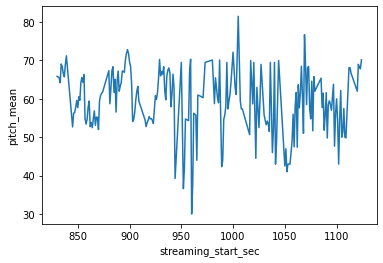

In [4]:
"""
plot time series of interest
"""
import seaborn as sns
sns.lineplot(data=assetDataSoFar_df, x="streaming_start_sec", y="pitch_mean")

In [283]:
"""
Find structural breaks: Kalman filter + CUSUM or some other online test
Inspo: file:///C:/Users/echow/AppData/Local/Temp/remotesensing-12-03135-v2.pdf
"""
from scipy.stats import multivariate_normal

# for now, keep the noise matrices as constants (can improve later)

# observations x: note, different dimension from Z (unlike sample code)
df_X = assetDataSoFar_df[['pitch_mean']]
x_obs = np.c_[df_X]
[n,d] = x_obs.shape

# number of lags
L = 3

### Latent state equation - vector z_t
# z_t = A_t z_{t-1} + <other regressors> + w_t
At = np.eye(L) # (L x L) - paper says to leave this as identity (random walk)
Qt = np.diag(np.ones(L)) # (L x L) covariance of errors in state eq.

### Observation equation - scalar x_t
# x_t = C_t z_t + <other regressors> + v_t
Ct = np.ones((1,L)) # (1 x L) - ARIMA lags
Rt = np.diag(np.ones(1)) # (1 x 1)

In [296]:

# Initial conditions (for the state variable z, stored in mu vars)
z0 = x_obs[1:(L+1)]
P0 = Qt

#Objects to store predictions and filtering locations
Z = np.zeros((n,L))
Zpred = np.zeros((n,L))

# store predictions
z = z0 # predicted zhat, ()
P = P0 # covariance of zhat, dim(L, L)
logL = 0

timerange = range(L+1, n-1)
for i in timerange:
        
    ### Get current observations xt, t
    # if missing value NA (resulting in missing Kalman predictions) then
    # just run the prediction step and continue
    # https://stats.stackexchange.com/questions/140990/using-kalman-filters-to-impute-missing-values-in-time-series
    x = np.array(x_obs[i])
    missing = any(np.isnan(x))
    
    ### Prediction step
    ### (can update variables directly bc don't require t-1|t-1 thereafter)
    # zhat, t|t-1
    z = At.dot(z)
    # Phat, t|t-1
    P = At.dot(P).dot(At.T) + Qt
    Zpred[i,:] = z.T
    
    # handle missing
    if (missing):
        Z[i,:] = np.nan
        continue
    
    ### update log-likelihood
    logL = logL + multivariate_normal.logpdf(x, mean=Ct.dot(z), cov=S)
    
    ### Measurement update step
    # Kalman gain Kt
    S = Ct.dot(P).dot(Ct.T) + Rt
    Kt = P.dot(Ct.T).dot( np.linalg.inv(S))
    # update zhat, t
    z = z + Kt.dot(x - C.dot(z))
    Z[i,:] = z.T
    # update P, t|t
    P = P - Kt.dot(Ct).dot(P)

#     #Prediction
#     mu = A.dot(mu) # no other reressors u
#     Sigma  = A.dot(Sigma).dot(A.T) + Q
#     Mupred[i,:] = mu
    
#     #Kalman Gain
#     S = C.dot(Sigma).dot(C.T) + R
#     K = Sigma.dot(C.T).dot(np.linalg.inv(S))
    
#     #Calculate log likelihood based on the i-th measurement
#     M = C.dot(mu.T)
#     logL = logL + multivariate_normal.logpdf(x, mean=M, cov=S)
    
#     # Correction
#     mu = mu + K.dot(x- C.dot(mu) )
#     Sigma = (np.identity(d) - K.dot(C)).dot(Sigma)
#     Mu[i,:] = mu
    
    if any(np.isnan(z)):
        raise Exception("check nans")

In [315]:
t=timerange
df_plt = pd.DataFrame({
    "time": t,
    "predicted": Zpred[timerange,0],
    "filtered": Z[timerange, 0]
})
df_plt.head()
px.line(df_plt, x="time", y=["predicted", "filtered"], template="plotly_dark")

In [ ]:
"""
start with one single time series - e.g. trading pitch_mean
build Bayesian forecasting model based on that pitch_mean
build trading rules on top of that, e.g. if think will go up with high confidence or rather rapidly, then submit buy signal
"""